# Improving Productivity of A Garment Industry

Currently we have dataset from A Garment Industry. The dataset shows several variable related to productivity such as:


*	date			:	Date in MM-DD-YYYY
*	day			:	Day of the Week
*	quarter			:	A portion of the month. A month was divided into four quarters
*	department		:	Associated department with the instance
*	team_no			:	Associated team number with the instance
*	no_of_workers		:	Number of workers in each team
*	no_of_style_change	:	Number of changes in the style of a particular product
*	targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.
*	smv			:	Standard Minute Value, it is the allocated time for a task
*	wip			:	Work in progress. Includes the number of unfinished items for products
*	over_time		:	Represents the amount of overtime by each team in minutes
*	incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
*	idle_time		:	The amount of time when the production was interrupted due to several reasons
*	idle_men		:	The number of workers who were idle due to production interruption
*	actual_productivity	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

The garment manufacturing process is a highly labour industry with many manual processes. Starting from producing the textile, pretreatment, dyeing, and finishing. Their labour productivity plays pivotal role in their business. By means of this dataset, we'll find the best recommendation to improve thei manufacturing process productivity.




**Goal**


*   Understanding business process of Garment Industry in this dataset
*   Give recommendation to improve productivity of Garment Industry by create model using regression



# Load Dataset

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [3]:
#import the dataset as df
df = pd.read_csv('garments_worker_productivity.csv')

In [4]:
df.head().T

0           1         2         3         4
date                   1/1/2015    1/1/2015  1/1/2015  1/1/2015  1/1/2015
quarter                Quarter1    Quarter1  Quarter1  Quarter1  Quarter1
department               sweing  finishing     sweing    sweing    sweing
day                    Thursday    Thursday  Thursday  Thursday  Thursday
team                          8           1        11        12         6
targeted_productivity       0.8        0.75       0.8       0.8       0.8
smv                       26.16        3.94     11.41     11.41      25.9
wip                      1108.0         NaN     968.0     968.0    1170.0
over_time                  7080         960      3660      3660      1920
incentive                    98           0        50        50        50
idle_time                   0.0         0.0       0.0       0.0       0.0
idle_men                      0           0         0         0         0
no_of_style_change            0           0         0         0         0
no_of_workers              59.0         8.0      30.5      30.5      56.0
actual_productivity    0.940725      0.8865   0.80057   0.80057  0.800382

In [5]:
df.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

First, we take a look on descriptive statistic of numerical variable.


1.   **team**: maxium number of team is 12 and minimum is 1, the median is 6
2.   **targeted_productivity**: maximum value is 0.8, median is 0.75, and minimum is 0.07
3.   **smv**: maximum value is 54.56, median is 15.26, and minimum is 2.9
4.   **wip**: maximum value is 23122, median is 1039, and minimum is 7. Potential containing outlier
5.   **over_time**: maximum value is 25920, median is 3960, minimum is 0. Potential containing outlier
6.   **incentive**: maximum value is 3600, median is 0, minimum is 0
7.   **idle_time**: maximum value is 150, median is 0, minimum is 0
8.   **no_of_style_change**: maximum value is 2, median is 0, minimum is 0
9.   **no_of_workers**: maximum value is 89, median is 34, min 2
10.  **actual_productivity**: maximum value is 1.12, median is 0.77, minimum is 0.23



In [6]:
# Define a color palette with the desired colors
# Define your custom color palette
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6"]

# Create a pair plot with the custom palette
sns.set(style="ticks")

In [7]:
#check on dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We have 1197 observation with 15 feature. We also identified mixing value in 'wip'. From now on, we'll proceed to EDA and design the strategy prior to modelling.

In [8]:
# Check duplicate
num_duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


No need to worry on duplicated data

After splitting data train and data test. We'll conduct EDA using data train.

# Exploratory Data Analysis (Preparation for Data Cleaning)

## Predictor 1, Date

In [9]:
# Checking on how long this dataset was collected
df['date'] = pd.to_datetime(df['date'])

# Find the minimum and maximum dates
min_date = df['date'].min()
max_date = df['date'].max()

# Calculate the time period
time_period = max_date - min_date

print(f"The dataset covers the period from {min_date} to {max_date}.")
print(f"The time period covered by the dataset is: {time_period}")


The dataset covers the period from 2015-01-01 00:00:00 to 2015-03-11 00:00:00.
The time period covered by the dataset is: 69 days 00:00:00


The data was collected for about 2 months 9 day

**Insight**


*   The data were collected in less than 3 month
*   We'll drop the date from our final dataframe as regression doesn't require date



## Predictor 2, Quarter

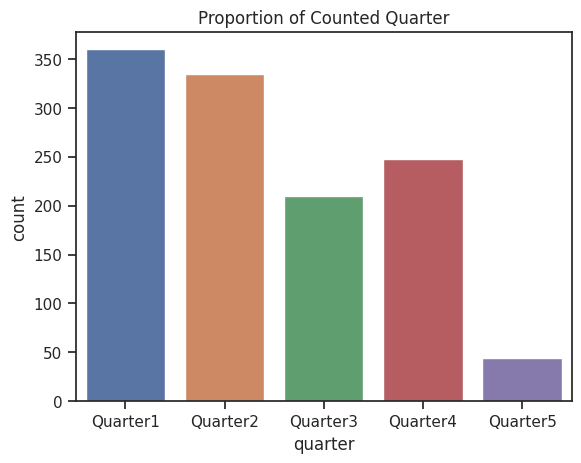

In [10]:
# Check on proportion of when the data collected by quarter
sns.countplot(df, x="quarter")
plt.title("Proportion of Counted Quarter")
plt.show()

Most of data are collected during quarter 1 each month

**Insight**
We also drop Quarter from our final datafram in data preprocessing

## Predictor 3, Department

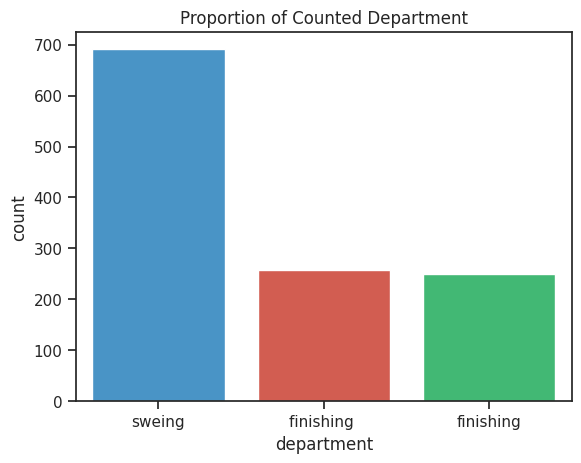

In [11]:
# Check on proportion by deparment
sns.countplot(df, x="department", palette=custom_palette)
plt.title("Proportion of Counted Department")
plt.show()

In [12]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [13]:
unique_departments = df['department'].unique()
print(unique_departments)

['sweing' 'finishing ' 'finishing']


**Insight**

*   Typo on sewing, will replace to sewing
*   There are two department, sewing and finishing.
*   However, the value of finishing was detected as two different value. We need to solve this issue during preprocessing

## Predictor 4, Day

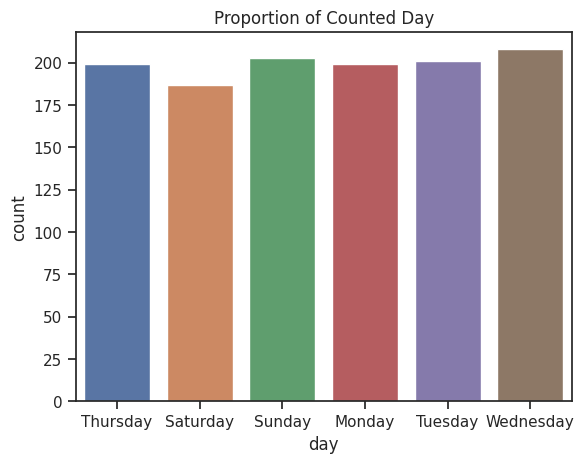

In [14]:
# Check on proportion of when the data collected by day
sns.countplot(df, x="day")
plt.title("Proportion of Counted Day")
plt.show()

**Insight**

* We learn that the operation is off on friday.
* The proportion of day when data collected is quite similar
* This column will be dropped as it will not support our final goal on analysis

## Predictor 5, Team

In [15]:
# Check value
df['team'].value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

**Insight**


*   The company has 12 team for both sewing and finishing, yet composition of sewing is higher than finishing
*   This feature is not very useful on our analysis
*   Will drop this column during data preprocessing



## Predictor 6, Targeted productivity

In [16]:
# Check on descriptive statistic of targeted_productivity
df['targeted_productivity'].describe()

count    1197.000000
mean        0.729632
std         0.097891
min         0.070000
25%         0.700000
50%         0.750000
75%         0.800000
max         0.800000
Name: targeted_productivity, dtype: float64

* The median target productivity is 0.75, while the average is 0.73
* The Q3 value is similar with max value, 0.80
* The lowest value is 0.07 which lower than Q1 value, 0.7

<ipython-input-17-a0e662ead0fa>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="targeted_productivity", kde=True, palette=custom_palette)


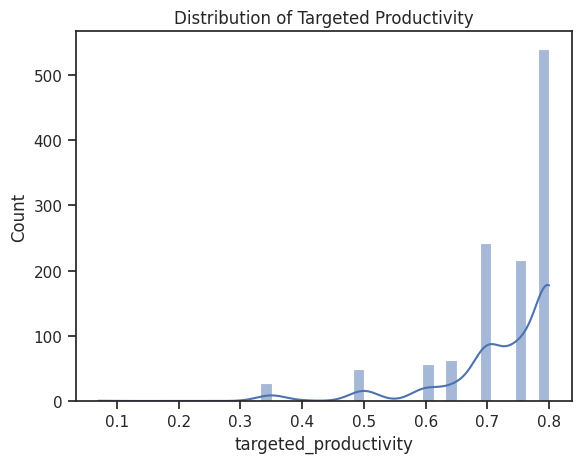

In [17]:
# Check on proportion of targeted productivity
sns.histplot(data=df, x="targeted_productivity", kde=True, palette=custom_palette)
plt.title("Distribution of Targeted Productivity")
plt.show()

The targeted_productivity has left-skewed distribution

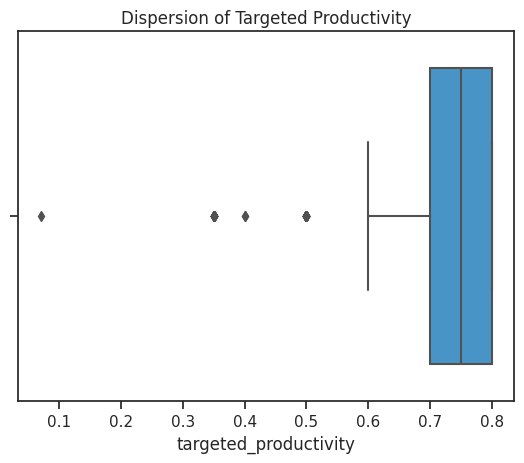

In [18]:
# Check on dispersion of targeted productivity
sns.boxplot(data=df, x="targeted_productivity", palette=custom_palette)
plt.title("Dispersion of Targeted Productivity")
plt.show()

The highes target of productivity is 0.8 while the lowest is 0.1

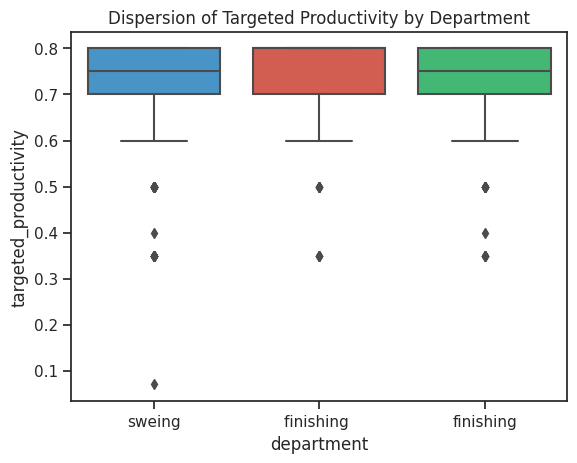

In [19]:
# Check on dispersion of targeted productivity
sns.boxplot(data=df, x="department", y="targeted_productivity", palette=custom_palette)
plt.title("Dispersion of Targeted Productivity by Department")
plt.show()

The 'targeted_productivity' of each departement is similar. Except for sewing, they had targeted productivity at least 0.1

**Insight**

* Basically, in manufacturing, they always work to be better than target. The targeted_value will be highly correlated with actual value. Thus, we'll drop targeted_value in data preprocessing

## Predictor 7, Submitted Minute Value (SMV)

In [20]:
# Check descriptive statistic of smv
df['smv'].describe()

count    1197.000000
mean       15.062172
std        10.943219
min         2.900000
25%         3.940000
50%        15.260000
75%        24.260000
max        54.560000
Name: smv, dtype: float64

We need to remove outlier within smv

<ipython-input-21-77c98e8d2014>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.histplot(data=df, x="smv", hue="department", kde=True, palette=custom_palette)


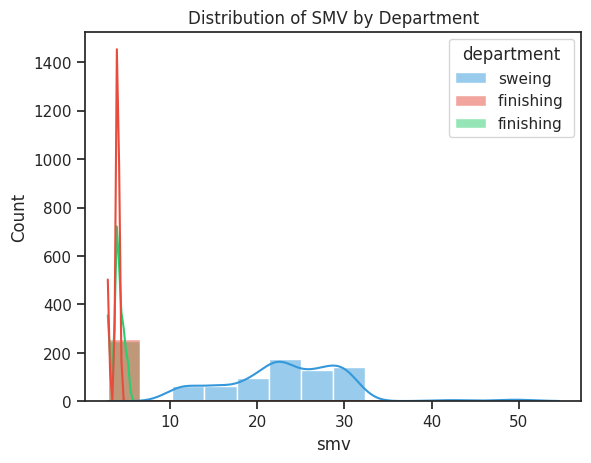

In [21]:
# Check on proportion of smv by department
sns.histplot(data=df, x="smv", hue="department", kde=True, palette=custom_palette)
plt.title("Distribution of SMV by Department")
plt.show()

We learn that SMV of Finishing Dept is less than 10 min

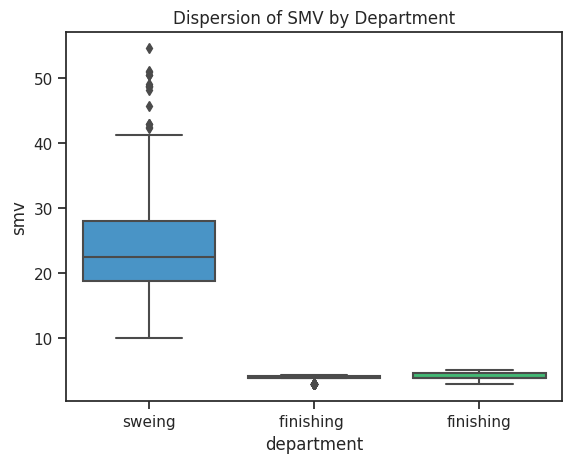

In [22]:
# Check on proportion of smv by department
sns.boxplot(data=df, y="smv", x="department", palette=custom_palette)
plt.title("Dispersion of SMV by Department")
plt.show()

The SMV of sewing department is relatively higher than Finishing department

In [23]:
# Calculate Q1 and Q3 of smv
Q1_smv = np.percentile(df['smv'], 25)
Q3_smv = np.percentile(df['smv'], 75)

# Calculate IQR
IQR_smv = Q3_smv - Q1_smv

# Calculate the thresholds
min_smv = Q1_smv - 1.5*IQR_smv
max_smv = Q3_smv + 1.5*IQR_smv

min_smv, max_smv

(-26.54, 54.74)

The lowest value in smv is zero, meaning we only deal with value > 54.74 when removing outlier

**Insight**

* SMV of sewing dept is higher than Finsihing
* We need to remove outlier higher than 54.74

## Predictor 8, Work in Progress (WIP)

In [24]:
# Check descriptive statistic wip
df['wip'].describe()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

Data within wip is highly dispersed indicated by high std dev. High amount of outlier data need to be removed prior to modelling

In [25]:
# Check on missing value
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

We have 506 missing value. Considering the data distribution, using 0 would be more favorable

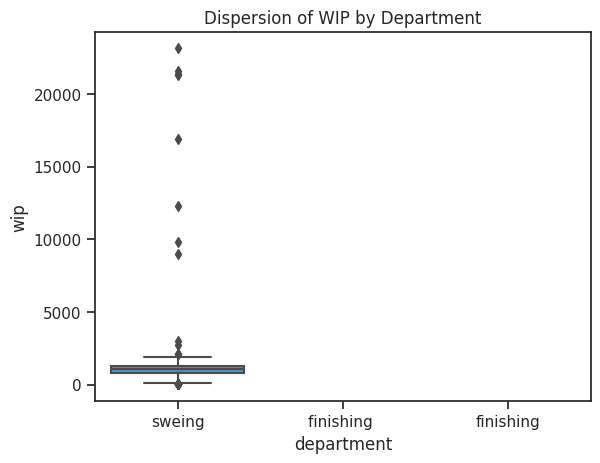

In [26]:
# Check on proportion of wip by department
sns.boxplot(data=df, y="wip", x="department", palette=custom_palette)
plt.title("Dispersion of WIP by Department")
plt.show()

Missing value of WIP is found for finishing department only

<ipython-input-27-33baa91006d3>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="wip",kde=True, palette=custom_palette)


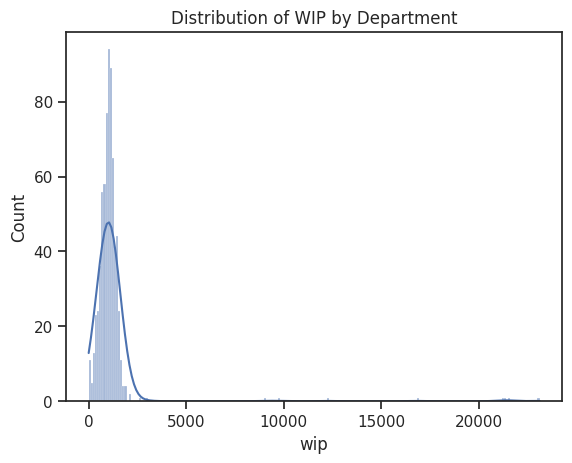

In [27]:
# Check on proportion of wip by department
sns.histplot(data=df, x="wip",kde=True, palette=custom_palette)
plt.title("Distribution of WIP by Department")
plt.show()

WIP has outlier that make the distribution is right-skewed

In [28]:
# Calculate Q1 and Q3 of wip
Q1_wip = np.percentile(df['wip'], 25)
Q3_wip = np.percentile(df['wip'], 75)

# Calculate IQR
IQR_wip = Q3_wip - Q1_wip

# Calculate the thresholds
min_wip = Q1_wip - 1.5*IQR_wip
max_wip = Q3_wip + 1.5*IQR_wip

min_wip, max_wip

(nan, nan)

We need to fill in missing value before removing the outlier

**Insight**

*   We'll replace missing value with median
*   We identified outlier in this columns, yet unable to calculate due to missing value
*   We'll check on outlier after handling missing value done during preprocessing



## Predictor 9, Overtime

In [29]:
# Check descriptive statistic over_time
df['over_time'].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

<ipython-input-30-dbf54960d388>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="over_time", kde=True, palette=custom_palette)


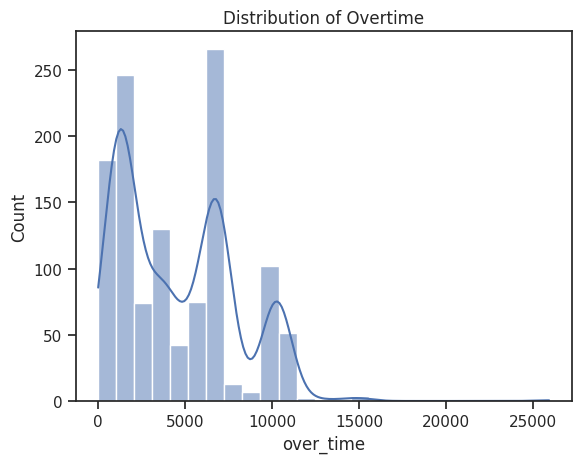

In [30]:
# Check on distribution of over_time
sns.histplot(data=df, x="over_time", kde=True, palette=custom_palette)
plt.title("Distribution of Overtime")
plt.show()

The overtime is distributed in right-skewed



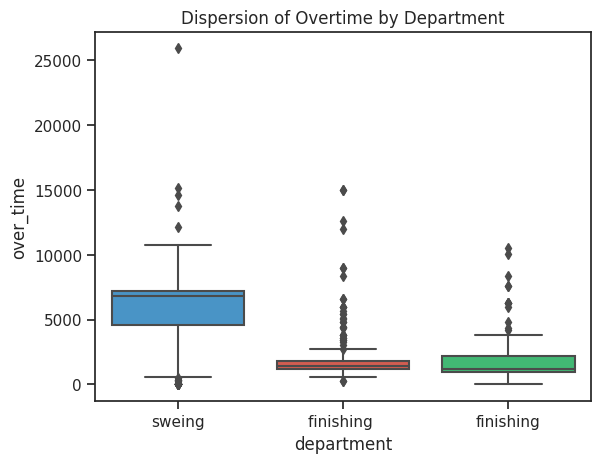

In [31]:
# Check dispersion of over_time by department
sns.boxplot(data=df, x='department', y='over_time', palette=custom_palette)
plt.title("Dispersion of Overtime by Department")
plt.show()

<ipython-input-32-75de09ecaab9>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x='targeted_productivity', y='over_time', hue='department', palette=custom_palette, data=df)


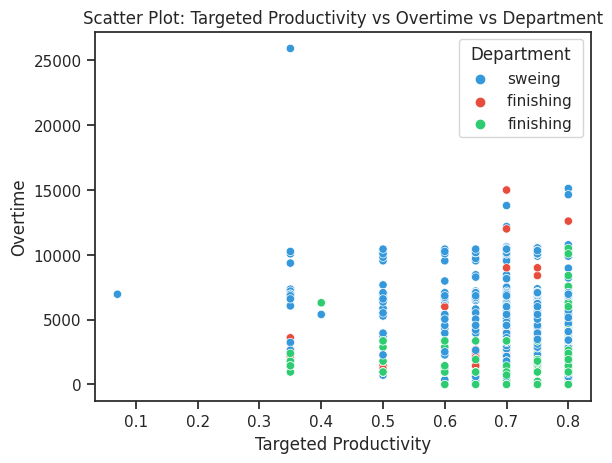

In [32]:
# Check correlation between targeted_productivity and over_time
sns.scatterplot(x='targeted_productivity', y='over_time', hue='department', palette=custom_palette, data=df)
plt.title('Scatter Plot: Targeted Productivity vs Overtime vs Department')
plt.xlabel('Targeted Productivity')
plt.ylabel('Overtime')
plt.legend(title='Department')
plt.show()

The highest overtime is achieved by sewing

In [33]:
# Calculate Q1 and Q3 of over_time
Q1_over_time = np.percentile(df['over_time'], 25)
Q3_over_time = np.percentile(df['over_time'], 75)

# Calculate IQR
IQR_over_time = Q3_over_time - Q1_over_time

# Calculate the thresholds
min_over_time = Q1_over_time - 1.5*IQR_over_time
max_over_time = Q3_over_time + 1.5*IQR_over_time

min_over_time, max_over_time

(-6840.0, 15240.0)

**Insight**


*   sewing dept has higher overtime than Finishing
*   sewing dept tend to require more overtime to achieve target productivity than finishing
*   Further analysis require us to remove outlier in over_time



## Predictor 10, Incentive

In [34]:
# Check descriptive statistic incentive
df['incentive'].describe()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

Incentive has outlier that require to be removed prior modelling

<ipython-input-35-3c45d9caa481>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="incentive", kde=True, palette=custom_palette)


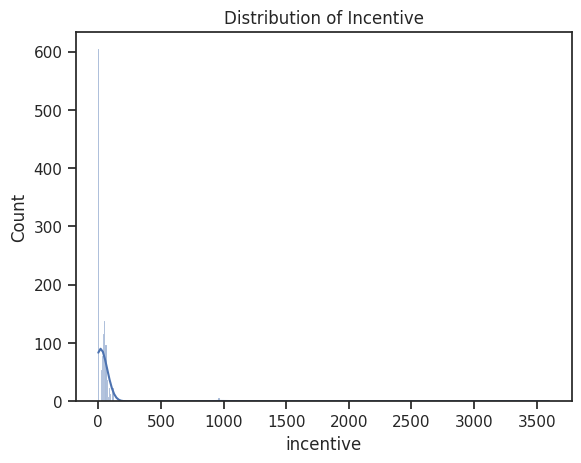

In [35]:
# Check on distribution of incentive
sns.histplot(data=df, x="incentive", kde=True, palette=custom_palette)
plt.title("Distribution of Incentive")
plt.show()

The data contain outlier that lead to right-skew distribution

<ipython-input-36-85dc19fcb1a6>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=df, x="date", y="incentive", hue="department", palette=custom_palette)


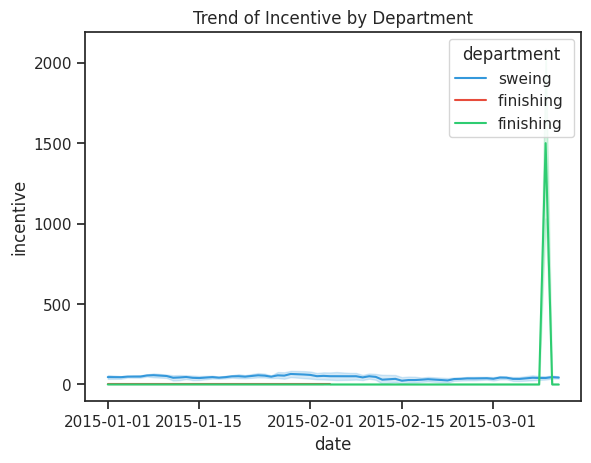

In [36]:
# Check trend on incentive by date
sns.lineplot(data=df, x="date", y="incentive", hue="department", palette=custom_palette)
plt.title("Trend of Incentive by Department")
plt.show()

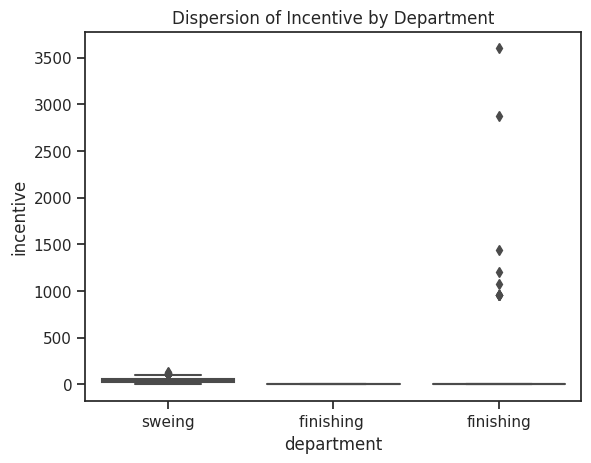

In [37]:
# Check dispersion of incentive by department
sns.boxplot(data=df, x='department', y='incentive', palette=custom_palette)
plt.title("Dispersion of Incentive by Department")
plt.show()

A lot of outlier incentive occured in the last period of data collection. Finishing received the highest incentive.

<ipython-input-38-888a034aac9d>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x='over_time', y='incentive', hue='department', palette=custom_palette)


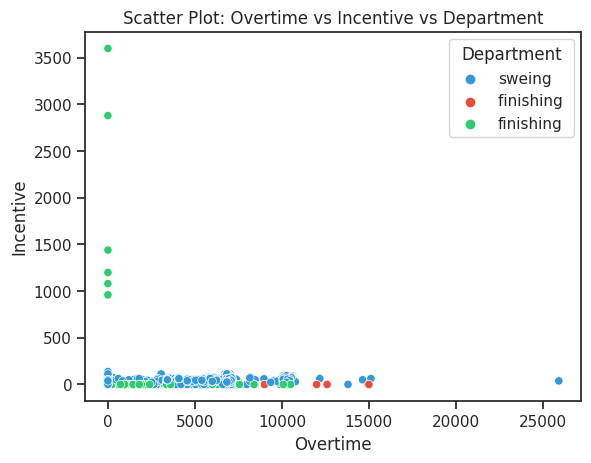

In [38]:
# Check correlation between incentive vs overtime vs department
sns.scatterplot(data=df, x='over_time', y='incentive', hue='department', palette=custom_palette)
plt.title('Scatter Plot: Overtime vs Incentive vs Department')
plt.xlabel('Overtime')
plt.ylabel('Incentive')
plt.legend(title='Department')
plt.show()

It doesn't seem that overtime and incentive is correlated, but it may be noised but outlier. We'll check it later after removing all outliers

In [39]:
# Calculate Q1 and Q3 of incentive
Q1_incentive = np.percentile(df['incentive'], 25)
Q3_incentive = np.percentile(df['incentive'], 75)

# Calculate IQR
IQR_incentive = Q3_incentive - Q1_incentive

# Calculate the thresholds
min_incentive = Q1_incentive - 1.5*IQR_incentive
max_incentive = Q3_incentive + 1.5*IQR_incentive

min_incentive, max_incentive

(-75.0, 125.0)

**Insight**
*    It doesn't clear whether the incentive was given based on productivity or periodically
*    Finishing received higher number of incentive than Sewing
*    We need to remove outlier later in incentive

## Predictor 11, Idle Time

In [40]:
# Check proportion on idle_time
df['idle_time'].value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

<ipython-input-41-3897eab2c98c>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.histplot(data=df, x="idle_time", hue="department", kde=True, palette=custom_palette)


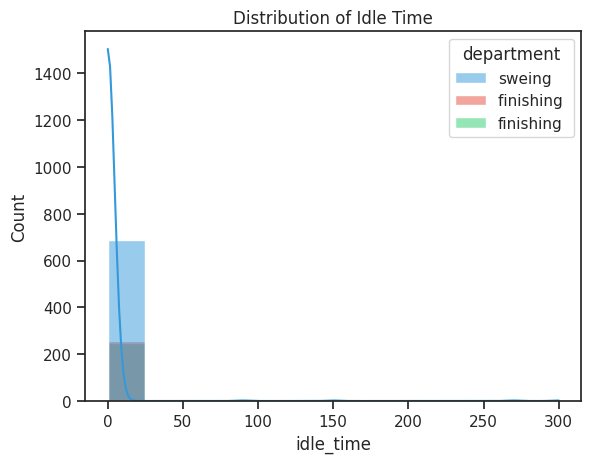

In [41]:
# Check on distribution of idle_time
sns.histplot(data=df, x="idle_time", hue="department", kde=True, palette=custom_palette)
plt.title("Distribution of Idle Time")
plt.show()

The manufacturing process is already good but still improvable which showed by low idle time, less than 20. Some outliers make the data right skewed

<ipython-input-42-c1ef4d8fe8bd>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=df, x="date", y="idle_time", hue="department", palette=custom_palette)


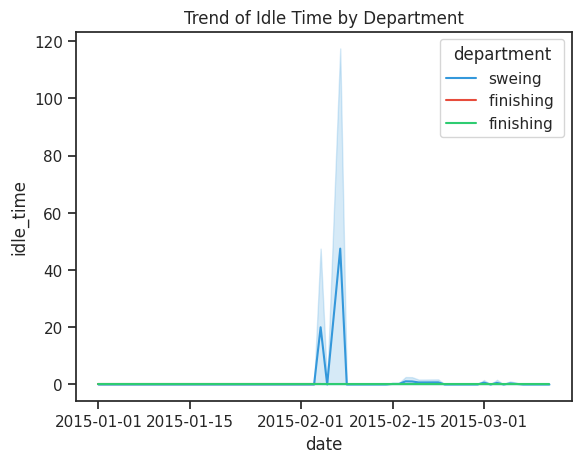

In [42]:
# Check trend on idle_time by date
sns.lineplot(data=df, x="date", y="idle_time", hue="department", palette=custom_palette)
plt.title("Trend of Idle Time by Department")
plt.show()

In [43]:
# Calculate Q1 and Q3 of idle_time
Q1_idle_time = np.percentile(df['idle_time'], 25)
Q3_idle_time = np.percentile(df['idle_time'], 75)

# Calculate IQR
IQR_idle_time = Q3_idle_time - Q1_idle_time

# Calculate the thresholds
min_idle_time = Q1_idle_time - 1.5*IQR_idle_time
max_idle_time = Q3_idle_time + 1.5*IQR_idle_time

min_idle_time, max_idle_time

(0.0, 0.0)

**Insight**

* Only few idle time occured, which mean good but still improvable
* I don't think we need to remove outlier in idle time, but we'll keep the IQR value for precaution

## Predictor 12, Idle Men

In [44]:
# Check proportion on idle_men
df['idle_men'].value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

<ipython-input-45-1ce5840b7582>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.histplot(data=df, x="idle_men", hue="department", kde=True, palette=custom_palette)


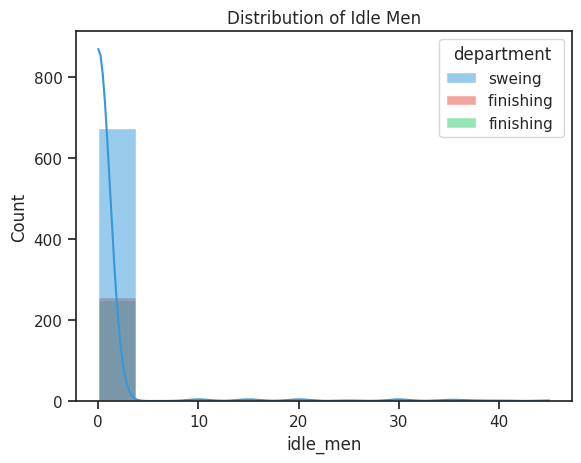

In [45]:
# Check on distribution of idle_men
sns.histplot(data=df, x="idle_men", hue="department", kde=True, palette=custom_palette)
plt.title("Distribution of Idle Men")
plt.show()

<ipython-input-46-e4b9f3212913>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x='idle_men', y='idle_time', hue='department', palette=custom_palette)


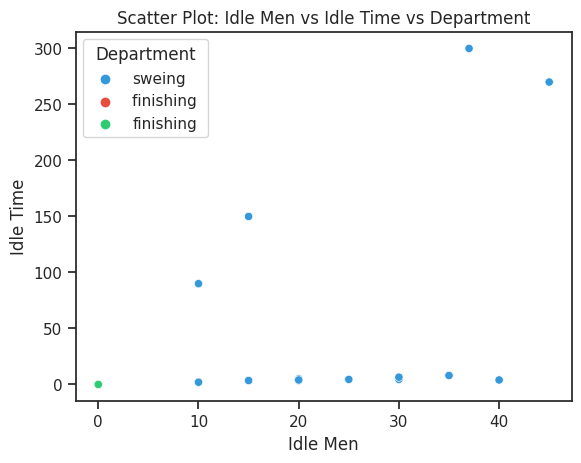

In [46]:
# Check correlation between idle_men vs idle_time vs deparment
sns.scatterplot(data=df, x='idle_men', y='idle_time', hue='department', palette=custom_palette)
plt.title('Scatter Plot: Idle Men vs Idle Time vs Department')
plt.xlabel('Idle Men')
plt.ylabel('Idle Time')
plt.legend(title='Department')
plt.show()

Sewing dept has higher number of idle men and higher idle time than finishing

<ipython-input-47-9c644fcef77a>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=df, x="date", y="idle_men", hue="department", palette=custom_palette)


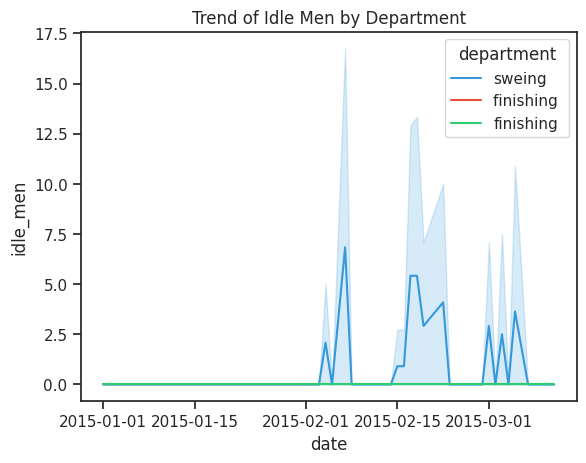

In [47]:
# Check trend on idle_men by date
sns.lineplot(data=df, x="date", y="idle_men", hue="department", palette=custom_palette)
plt.title("Trend of Idle Men by Department")
plt.show()

At the end of data collection period, we see that higher number of idle men occured due to higher number of production interruption

In [48]:
# Calculate Q1 and Q3 of idle_men
Q1_idle_men = np.percentile(df['idle_men'], 25)
Q3_idle_men = np.percentile(df['idle_men'], 75)

# Calculate IQR
IQR_idle_men = Q3_idle_men - Q1_idle_men

# Calculate the thresholds
min_idle_men = Q1_idle_men - 1.5*IQR_idle_men
max_idle_men = Q3_idle_men + 1.5*IQR_idle_men

min_idle_men, max_idle_men

(0.0, 0.0)

**Insight**

* Idle men highly occured in the last period of data collection
* Most of idle men and idle time occured in Sewing Department
* I don't think we need to remove outlier in idle men, but we'll keep the IQR value for precaution

## Predictor 13, Number of Style Change

In [49]:
# Check proportion on idle_men
df['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

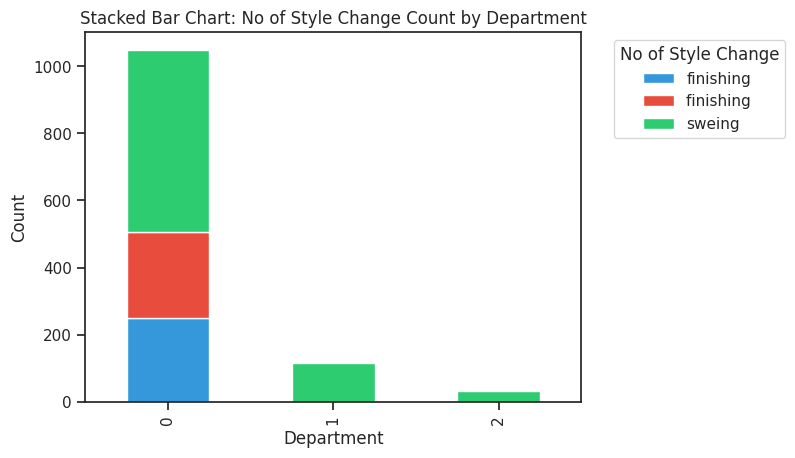

In [50]:
# Visualize number of style change using stacked barchart
# Group by department and team, then calculate the count
grouped_data = df.groupby(['no_of_style_change', 'department']).size().unstack(fill_value=0)

# Plot the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, color=custom_palette)
plt.title('Stacked Bar Chart: No of Style Change Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='No of Style Change', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

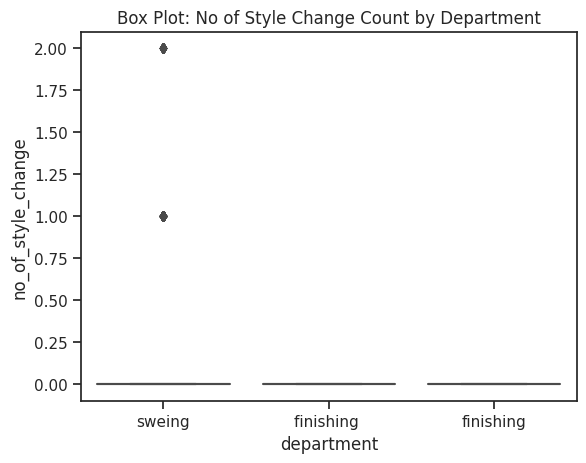

In [51]:
# Check dispersion of incentive by department
sns.boxplot(data=df, y='no_of_style_change', x="department", palette=custom_palette)
plt.title('Box Plot: No of Style Change Count by Department')
plt.show()

Sewing dept has higher number of style changes than finishing. However, style change occurs less than 100 observations with all changes happened in Sewing department

<ipython-input-52-fb5f63ca5127>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x='no_of_style_change', y='smv', hue='department', palette=custom_palette)


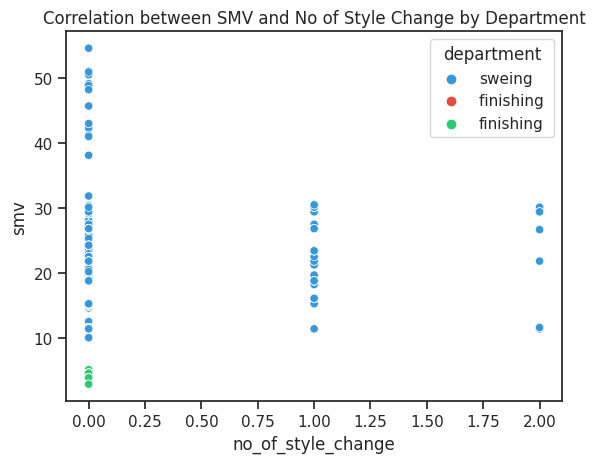

In [52]:
# Check correlation between no_of_workers vs smv
sns.scatterplot(data=df, x='no_of_style_change', y='smv', hue='department', palette=custom_palette)
plt.title("Correlation between SMV and No of Style Change by Department")
plt.show()

In [53]:
# Calculate Q1 and Q3 of no of style change
Q1_no_of_style_change = np.percentile(df['no_of_style_change'], 25)
Q3_no_of_style_change = np.percentile(df['no_of_style_change'], 75)

# Calculate IQR
IQR_no_of_style_change = Q3_no_of_style_change - Q1_no_of_style_change

# Calculate the thresholds
min_no_of_style_change = Q1_no_of_style_change - 1.5*IQR_no_of_style_change
max_no_of_style_change = Q3_no_of_style_change + 1.5*IQR_no_of_style_change

min_no_of_style_change, max_no_of_style_change

(0.0, 0.0)

**Insight**
* The maximum value of number of style change is 2 which observed within Sewing dept
* Number of style change occurs less than 100 observations
* In spite of containing outliers, we'll maintain the outlier due to it has possibility on helping us to build regression model later

## Predictor 14, Number of Worker

In [54]:
# Check proportion on no_of_workers
df['no_of_workers'].describe()

count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

<ipython-input-55-d59bcca1077b>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.histplot(data=df, x="no_of_workers", hue="department", palette=custom_palette)


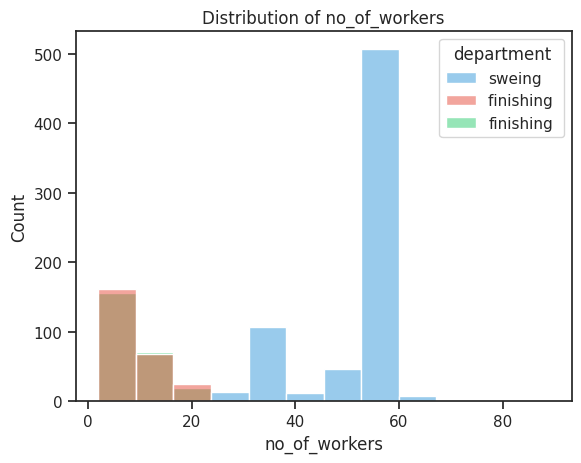

In [55]:
# Check on distribution of no_of_workers
sns.histplot(data=df, x="no_of_workers", hue="department", palette=custom_palette)
plt.title("Distribution of no_of_workers")
plt.show()

Number of worker has bimodal distribution. Most of workers in finishing is < 30 with majority 10. Meanwhile Sewing has the highest number of workers, between 30-60.

<ipython-input-56-14fa8db36330>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x='no_of_workers', y='smv', hue='department', palette=custom_palette)


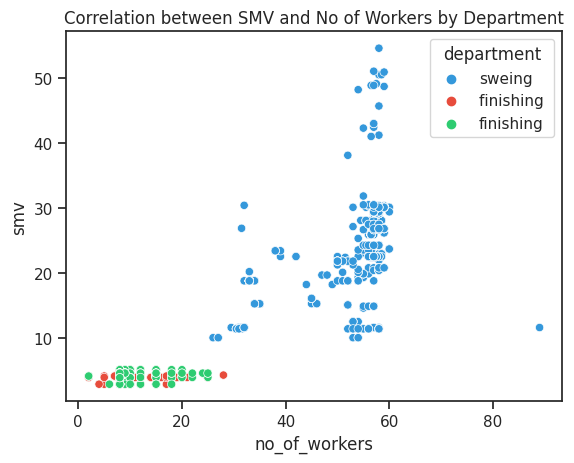

In [56]:
# Check correlation between no_of_workers vs smv
sns.scatterplot(data=df, x='no_of_workers', y='smv', hue='department', palette=custom_palette)
plt.title("Correlation between SMV and No of Workers by Department")
plt.show()

The higher number of workers the higher smv

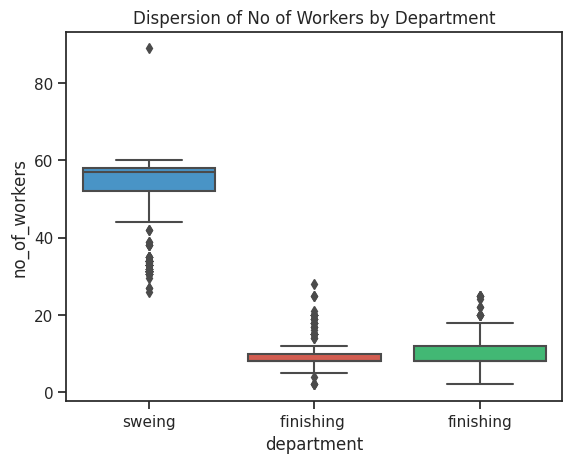

In [57]:
# Check dispersion of no_of_workers by department
sns.boxplot(data=df, y='no_of_workers', x="department", palette=custom_palette)
plt.title("Dispersion of No of Workers by Department")
plt.show()

<ipython-input-58-32a9b88ada17>:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x='no_of_workers', y='over_time', hue='department', palette=custom_palette, data=df)


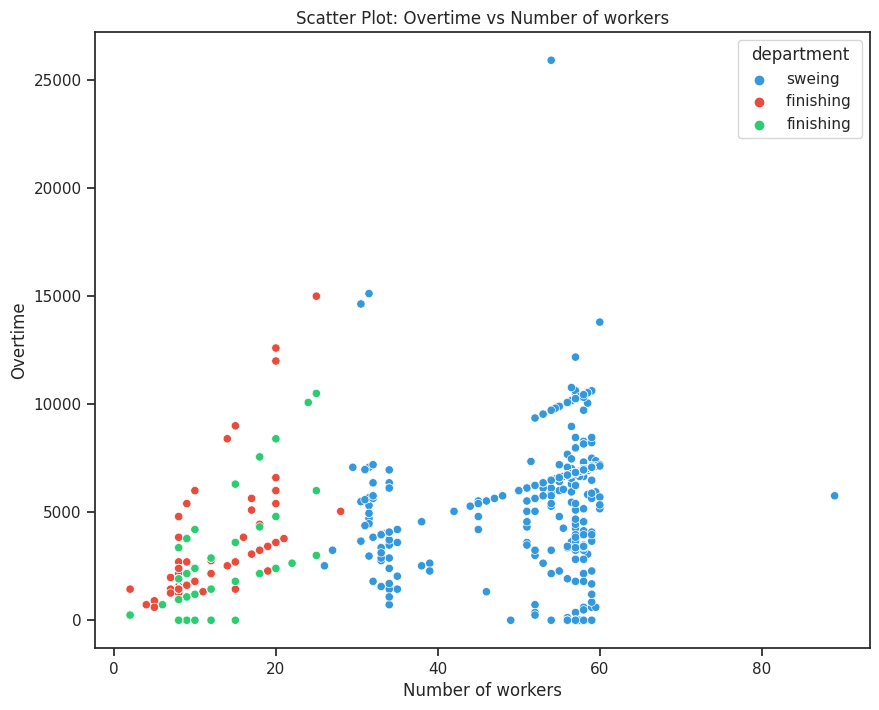

In [58]:
# Check correlation between no_of_workers and over_time
plt.figure(figsize=(10, 8))
sns.scatterplot(x='no_of_workers', y='over_time', hue='department', palette=custom_palette, data=df)
plt.title('Scatter Plot: Overtime vs Number of workers')
plt.xlabel('Number of workers')
plt.ylabel('Overtime')
plt.show()

Higher number of worker put higher over time

In [59]:
# Calculate Q1 and Q3 of no of worker
Q1_no_of_workers = np.percentile(df['no_of_workers'], 25)
Q3_no_of_workers = np.percentile(df['no_of_workers'], 75)

# Calculate IQR
IQR_no_of_workers = Q3_no_of_workers - Q1_no_of_workers

# Calculate the thresholds
min_no_of_workers = Q1_no_of_workers - 1.5*IQR_no_of_workers
max_no_of_workers = Q3_no_of_workers + 1.5*IQR_no_of_workers

min_no_of_workers, max_no_of_workers

(-63.0, 129.0)

**Insight**

* The number of worker in finishing is less than Sewing
* We have one data outlier that need to be removed

## Predictor 15 Actual Productivity

In [60]:
# Check proportion on no_of_workers
df['actual_productivity'].describe()

count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64

<ipython-input-61-9deec504d36f>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.histplot(data=df, x="actual_productivity", hue="department", palette=custom_palette)


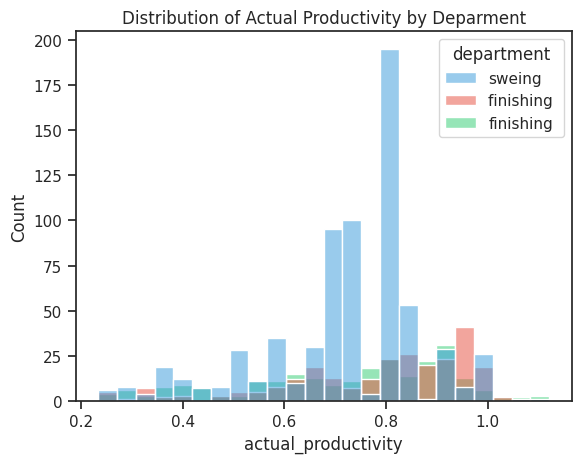

In [61]:
# Check on proportion of actual_productivity
sns.histplot(data=df, x="actual_productivity", hue="department", palette=custom_palette)
plt.title("Distribution of Actual Productivity by Deparment")
plt.show()

Sewing department has the most number of achieved actual productivity than finishing

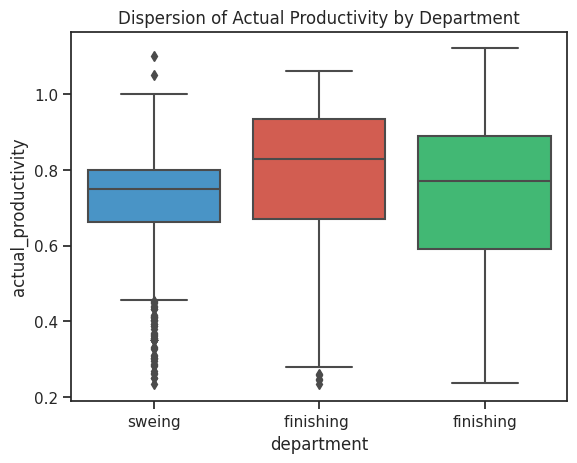

In [62]:
# Check dispersion of actual_productivity by department
sns.boxplot(data=df, y='actual_productivity', x="department", palette=custom_palette)
plt.title("Dispersion of Actual Productivity by Department")
plt.show()

<ipython-input-63-e719bc36dd75>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=df, x="date", y="actual_productivity", hue="department", palette=custom_palette)


<Axes: xlabel='date', ylabel='actual_productivity'>

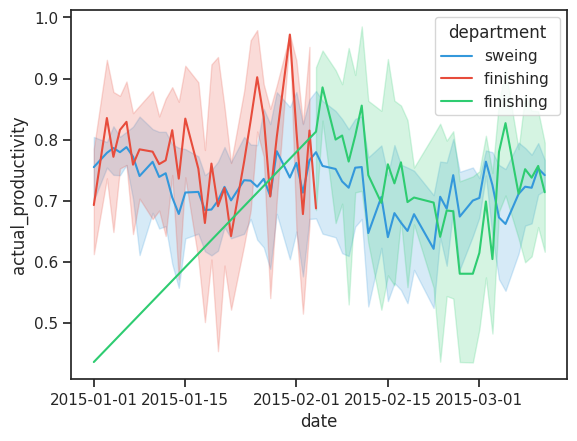

In [63]:
# Check trend on actual_productivity by date
sns.lineplot(data=df, x="date", y="actual_productivity", hue="department", palette=custom_palette)

We see that finishing has higher actual productivity than Sewing according to line chart

Productivity on Sunday tend to be lower than the other day

<ipython-input-64-957d714de3a9>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x='actual_productivity', y='incentive', hue='department', palette=custom_palette)


<Axes: xlabel='actual_productivity', ylabel='incentive'>

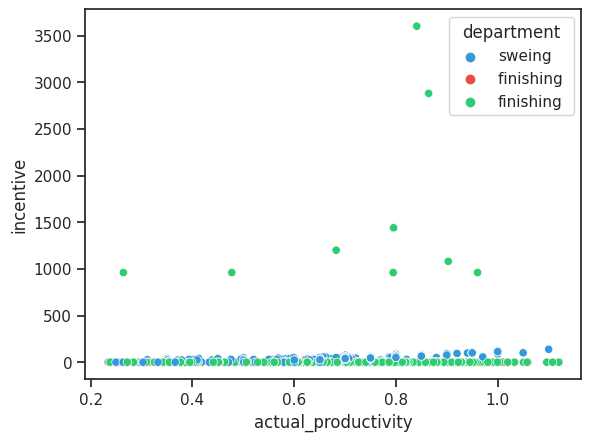

In [64]:
# Check correlation between actual_productivity vs incentive
sns.scatterplot(data=df, x='actual_productivity', y='incentive', hue='department', palette=custom_palette)

In [65]:
# Calculate Q1 and Q3 of no of worker
Q1_actual_productivity = np.percentile(df['actual_productivity'], 25)
Q3_actual_productivity = np.percentile(df['actual_productivity'], 75)

# Calculate IQR
IQR_actual_productivity = Q3_actual_productivity - Q1_actual_productivity

# Calculate the thresholds
min_actual_productivity = Q1_actual_productivity - 1.5*IQR_actual_productivity
max_actual_productivity = Q3_actual_productivity + 1.5*IQR_actual_productivity

min_actual_productivity, max_actual_productivity

(0.35038907, 1.150170598)

**Insight**
* No need to remove outlier due to the max value is below threshold

# Data Preprocessing for Further Exploratory

## Cleaning wrong value in 'department'

In [66]:
# Copy dataframe for data cleaning
data_clean = df.copy()

In [67]:
# Replace sweing to be sewing
data_clean['department'] = data_clean['department'].replace('sweing', 'sewing')

# Check value of department after cleaning
department_counts = data_clean['department'].value_counts()
print(department_counts)

sewing        691
finishing     257
finishing     249
Name: department, dtype: int64


In [68]:
# Clean finishing
data_clean['department'] = data_clean['department'].replace('finishing ', 'finishing')

# Check value of department after cleaning
department_counts = data_clean['department'].value_counts()
print(department_counts)

sewing       691
finishing    506
Name: department, dtype: int64


Text(0.5, 1.0, 'Department: Before Wrangling')

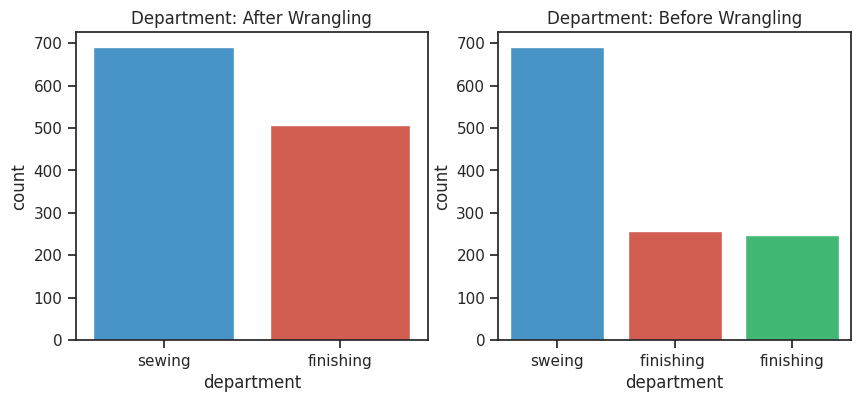

In [69]:
# Set a larger figure size
plt.figure(figsize=(10, 4))  # Adjust width and height as needed

# Compare Department before and after wrangling
plt.subplot(1, 2, 1)
sns.countplot(x='department', palette=custom_palette, data=data_clean)
plt.title('Department: After Wrangling')

plt.subplot(1, 2, 2)
sns.countplot(x='department', palette=custom_palette, data=df)
plt.title('Department: Before Wrangling')

## Handle missing value on 'wip'

In [70]:
# Fill missing value with 0
data_clean['wip']= data_clean['wip'].fillna(0)

In [71]:
# Check on missing value
data_clean.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

<ipython-input-72-7202c8ab83f9>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='department', y='wip', palette=custom_palette, data=df)


Text(0.5, 1.0, 'WIP: Before Wrangling')

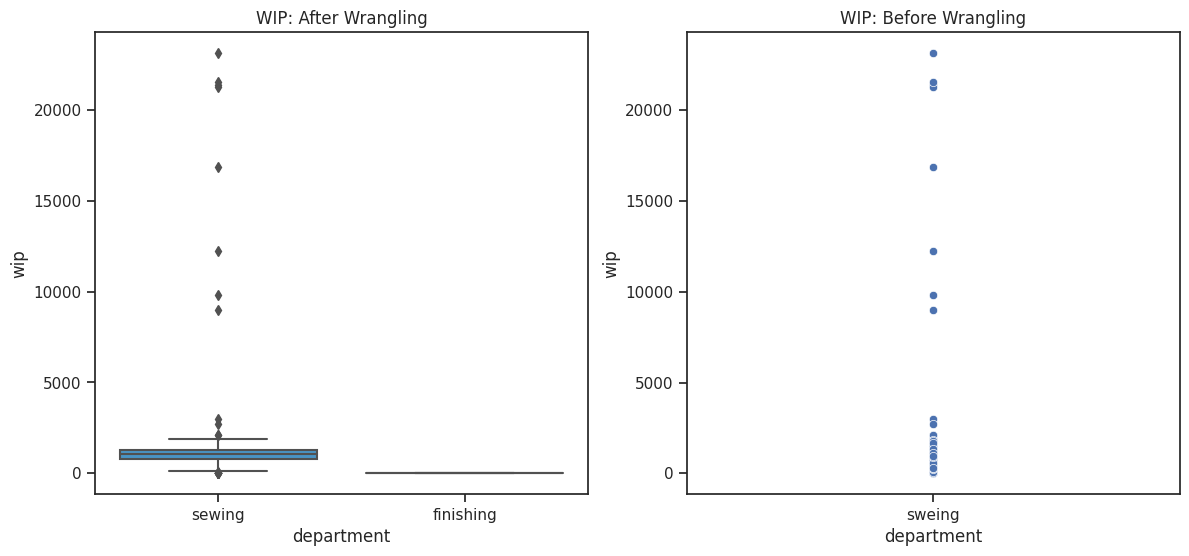

In [72]:
# Set a larger figure size
plt.figure(figsize=(14, 6))  # Adjust width and height as needed

# Compare WIP before and after wrangling
plt.subplot(1, 2, 1)
sns.boxplot(x='department', y='wip', palette=custom_palette, data=data_clean)
plt.title('WIP: After Wrangling')

plt.subplot(1, 2, 2)
sns.scatterplot(x='department', y='wip', palette=custom_palette, data=df)
plt.title('WIP: Before Wrangling')

In [73]:
# Calculate Q1 and Q3 of wip
Q1_wip = np.percentile(data_clean['wip'], 25)
Q3_wip = np.percentile(data_clean['wip'], 75)

# Calculate IQR
IQR_wip = Q3_wip - Q1_wip

# Calculate the thresholds
min_wip = Q1_wip - 1.5*IQR_wip
max_wip = Q3_wip + 1.5*IQR_wip

min_wip, max_wip

(-1624.5, 2707.5)

## Remove outlier

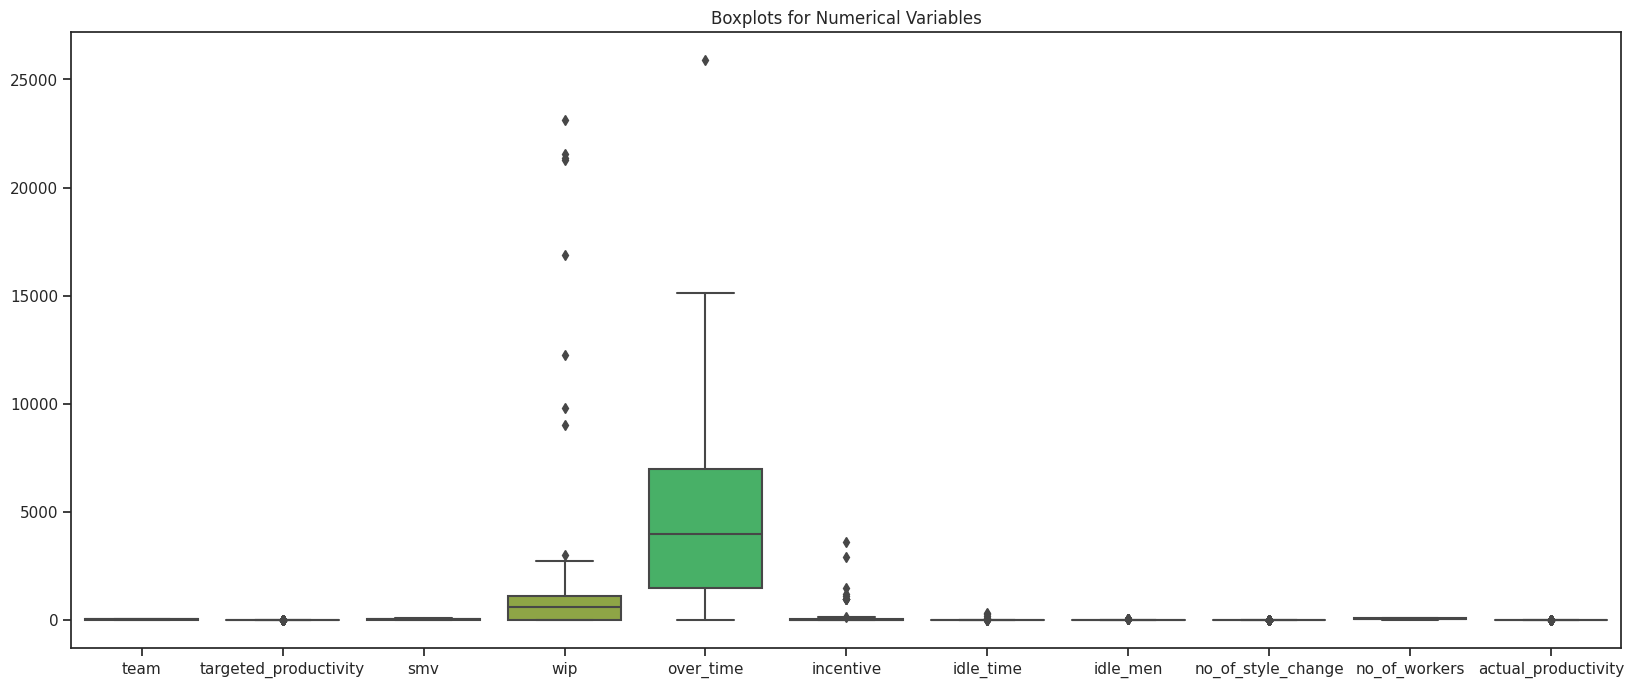

In [74]:
# Create boxplots for all features
plt.figure(figsize=(20, 8))
sns.boxplot(data=data_clean)
plt.title('Boxplots for Numerical Variables')
plt.show()

In [75]:
# Create a mask to filter out outliers

clean_1 = (data_clean['smv'] <= max_smv) & (data_clean['smv'] >= min_smv)
clean_2 = (data_clean['wip'] <= max_wip) & (data_clean['wip'] >= min_wip)
clean_3 = (data_clean['over_time'] <= max_over_time) & (data_clean['over_time'] >= min_over_time)
clean_4 = (data_clean['incentive'] <= max_incentive) & (data_clean['incentive'] >= min_incentive)
clean_5 = (data_clean['no_of_workers'] <= max_no_of_workers) & (data_clean['no_of_workers'] >= min_no_of_workers)

# Remove outliers
data_clean = data_clean[clean_1 & clean_2 & clean_3 & clean_4 & clean_5]

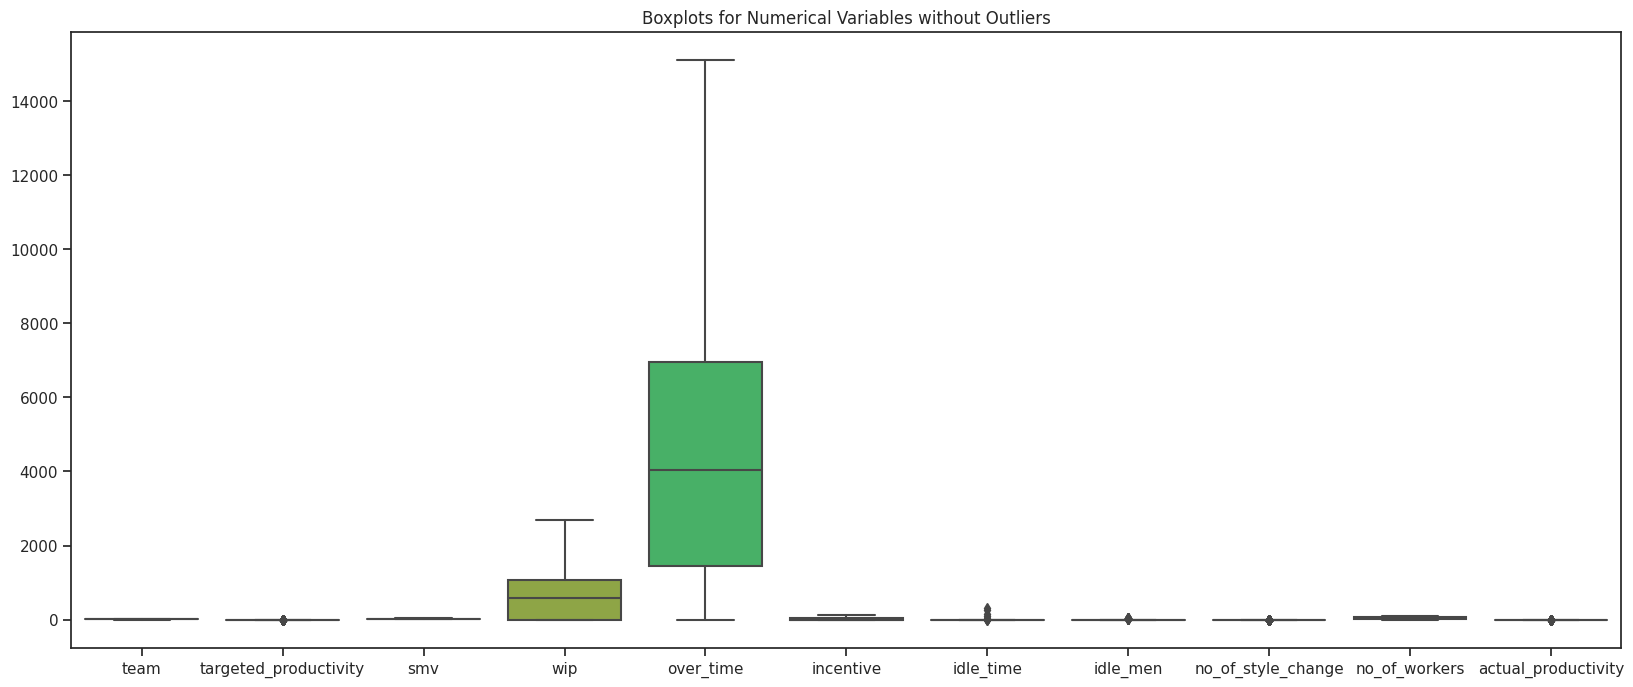

In [76]:
# Create boxplots for all features
plt.figure(figsize=(20, 8))
sns.boxplot(data=data_clean)
plt.title('Boxplots for Numerical Variables without Outliers')
plt.show()

In [77]:
# Check new data shape after removing outlier
data_clean.head().T

0                    1  \
date                   2015-01-01 00:00:00  2015-01-01 00:00:00   
quarter                           Quarter1             Quarter1   
department                          sewing            finishing   
day                               Thursday             Thursday   
team                                     8                    1   
targeted_productivity                  0.8                 0.75   
smv                                  26.16                 3.94   
wip                                 1108.0                  0.0   
over_time                             7080                  960   
incentive                               98                    0   
idle_time                              0.0                  0.0   
idle_men                                 0                    0   
no_of_style_change                       0                    0   
no_of_workers                         59.0                  8.0   
actual_productivity               0.940725               0.8865   

                                         2                    3  \
date                   2015-01-01 00:00:00  2015-01-01 00:00:00   
quarter                           Quarter1             Quarter1   
department                          sewing               sewing   
day                               Thursday             Thursday   
team                                    11                   12   
targeted_productivity                  0.8                  0.8   
smv                                  11.41                11.41   
wip                                  968.0                968.0   
over_time                             3660                 3660   
incentive                               50                   50   
idle_time                              0.0                  0.0   
idle_men                                 0                    0   
no_of_style_change                       0                    0   
no_of_workers                         30.5                 30.5   
actual_productivity                0.80057              0.80057   

                                         4  
date                   2015-01-01 00:00:00  
quarter                           Quarter1  
department                          sewing  
day                               Thursday  
team                                     6  
targeted_productivity                  0.8  
smv                                   25.9  
wip                                 1170.0  
over_time                             1920  
incentive                               50  
idle_time                              0.0  
idle_men                                 0  
no_of_style_change                       0  
no_of_workers                         56.0  
actual_productivity               0.800382

In [78]:
# Number of observation before wrangling
print("Number of data before wrangling: ",len(df))

# Number of observation after wrangling
print("Number of data after wrangling: ",len(data_clean))

# Number of data removed after wrangling
print("Number of data removed: ",len(df)-len(data_clean))


Number of data before wrangling:  1197
Number of data after wrangling:  1176
Number of data removed:  21


# Exploratory Data Analysis: Further in Productivity



## Trend Productivity: Date, Quarter, and Day


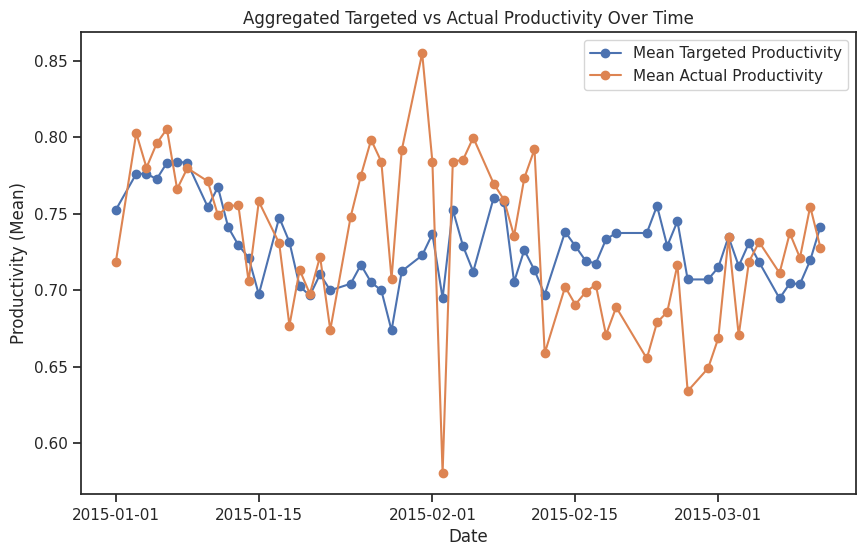

In [79]:
# Aggregate the data
agg_df = data_clean.groupby('date').agg({'targeted_productivity': 'mean', 'actual_productivity': 'mean'}).reset_index()

# Plot the aggregated line chart
plt.figure(figsize=(10, 6))

# Plotting aggregated targeted productivity
plt.plot(agg_df['date'], agg_df['targeted_productivity'], label='Mean Targeted Productivity', marker='o')

# Plotting aggregated actual productivity
plt.plot(agg_df['date'], agg_df['actual_productivity'], label='Mean Actual Productivity', marker='o')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Productivity (Mean)')
plt.title('Aggregated Targeted vs Actual Productivity Over Time')

# Show a legend
plt.legend()

# Show the plot
plt.show()

We see that mean of actual productivity during period 15 Jan to 15 Feb is higher than target. Meanwhile, after 15 Feb, the productivity is started to decline

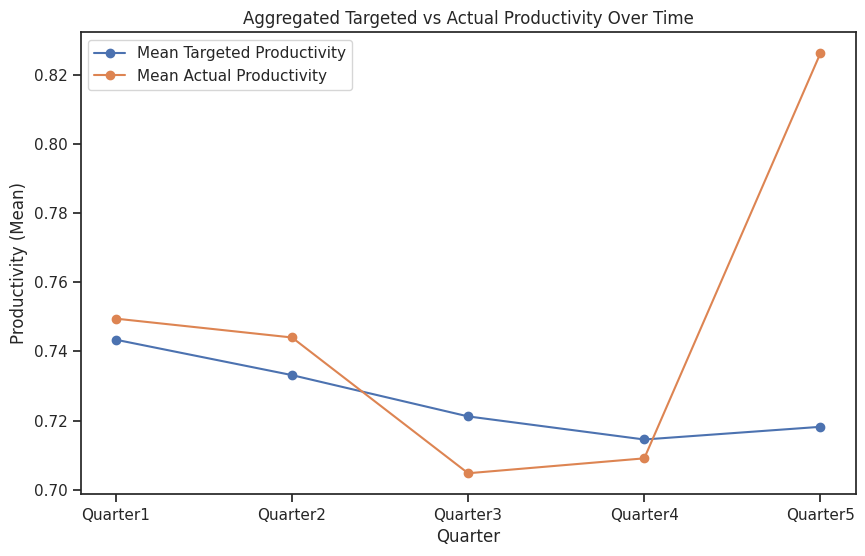

In [80]:
# Aggregate the data
agg_df = data_clean.groupby('quarter').agg({'targeted_productivity': 'mean', 'actual_productivity': 'mean'}).reset_index()

# Plot the aggregated line chart
plt.figure(figsize=(10, 6))

# Plotting aggregated targeted productivity
plt.plot(agg_df['quarter'], agg_df['targeted_productivity'], label='Mean Targeted Productivity', marker='o')

# Plotting aggregated actual productivity
plt.plot(agg_df['quarter'], agg_df['actual_productivity'], label='Mean Actual Productivity', marker='o')

# Set labels and title
plt.xlabel('Quarter')
plt.ylabel('Productivity (Mean)')
plt.title('Aggregated Targeted vs Actual Productivity Over Time')

# Show a legend
plt.legend()

# Show the plot
plt.show()

Productivity tend to drop on quarter 3 and bounce back quarter 4

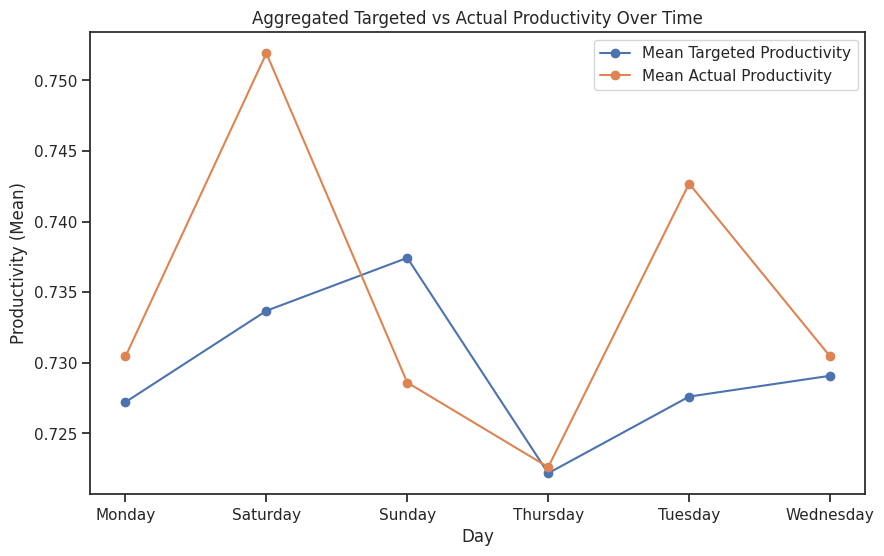

In [81]:
# Aggregate the data
agg_day = data_clean.groupby('day').agg({'targeted_productivity': 'mean', 'actual_productivity': 'mean'}).reset_index()

# Plot the aggregated line chart
plt.figure(figsize=(10, 6))

# Plotting aggregated targeted productivity
plt.plot(agg_day['day'], agg_day['targeted_productivity'], label='Mean Targeted Productivity', marker='o')

# Plotting aggregated actual productivity
plt.plot(agg_day['day'], agg_day['actual_productivity'], label='Mean Actual Productivity', marker='o')

# Set labels and title
plt.xlabel('Day')
plt.ylabel('Productivity (Mean)')
plt.title('Aggregated Targeted vs Actual Productivity Over Time')

# Show a legend
plt.legend()

# Show the plot
plt.show()

Productivity on Sundary is the worst when it's compared to the other days

## Create New Feature: productivity_difference

In [82]:
# Create new feature difference on target and actual productivity
data_clean['productivity_difference'] = df['actual_productivity'] - df['targeted_productivity']

In [83]:
# Check descriptive statistic
data_clean['productivity_difference'].describe()

count    1176.000000
mean        0.004764
std         0.160259
min        -0.561958
25%        -0.014440
50%         0.000500
75%         0.094792
max         0.644375
Name: productivity_difference, dtype: float64

<ipython-input-84-f7ced102eefd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_clean.corr()


<Figure size 1000x400 with 0 Axes>

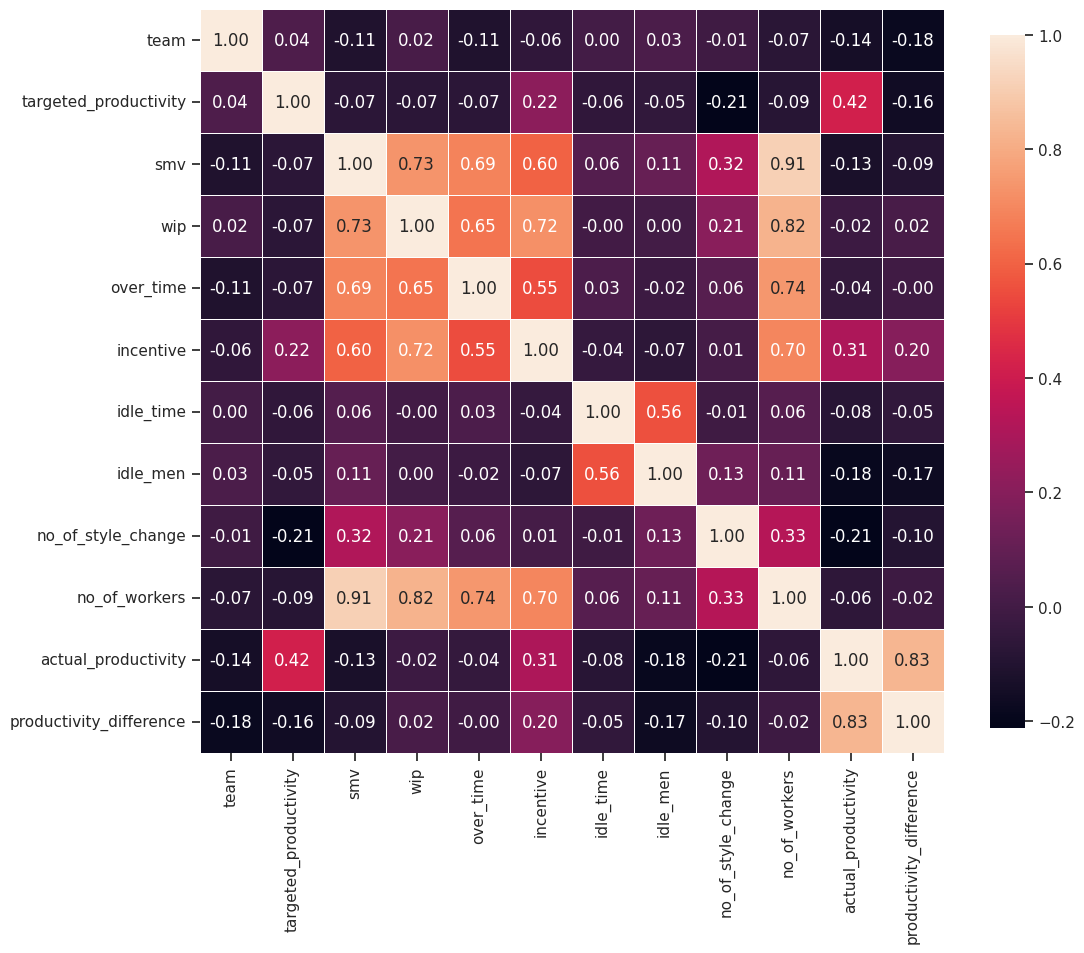

In [84]:
# Check correlation of numerical variable after productivity_difference added
corr = data_clean.corr()

plt.figure(figsize=(10, 4))

# Set up the Matplotlib figure
plt.figure(figsize=(12, 12))

# Create a heatmap using Seaborn
sns.heatmap(corr, annot=True, linewidths=.5, square=True, fmt='.2f', cbar_kws={"shrink": 0.75})

# Show the plot
plt.show()

## Team performance based on productivity

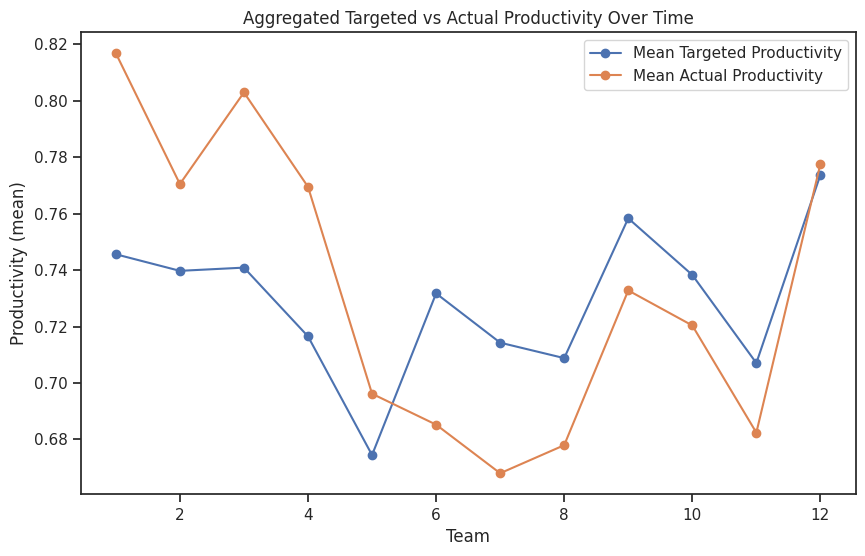

In [85]:
# Aggregate the data
agg_df = data_clean.groupby('team').agg({'targeted_productivity': 'mean', 'actual_productivity': 'mean'}).reset_index()

# Plot the aggregated line chart
plt.figure(figsize=(10, 6))

# Plotting aggregated targeted productivity
plt.plot(agg_df['team'], agg_df['targeted_productivity'], label='Mean Targeted Productivity', marker='o')

# Plotting aggregated actual productivity
plt.plot(agg_df['team'], agg_df['actual_productivity'], label='Mean Actual Productivity', marker='o')

# Set labels and title
plt.xlabel('Team')
plt.ylabel('Productivity (mean)')
plt.title('Aggregated Targeted vs Actual Productivity Over Time')

# Show a legend
plt.legend()

# Show the plot
plt.show()

Team 1-5, and 12 have better perfomance than 6-11

<ipython-input-86-c4d58eb5bece>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=data_clean, x="team", y="over_time", palette=custom_palette)


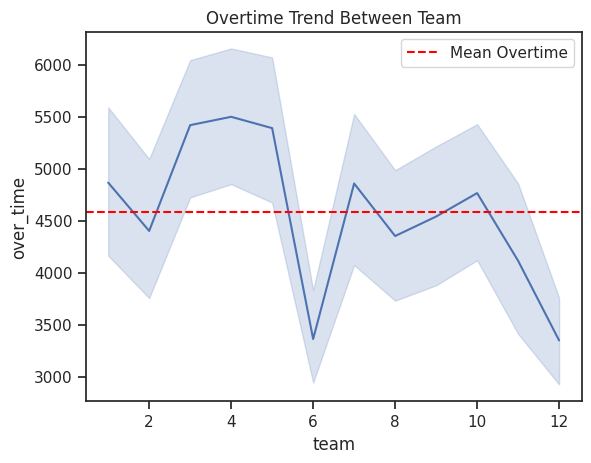

In [86]:
# Check trend on overtime by team
# Create the line plot
ax = sns.lineplot(data=data_clean, x="team", y="over_time", palette=custom_palette)

# Calculate the mean value of productivity_difference
mean_value = data_clean["over_time"].mean()

# Add a horizontal line at the mean value
ax.axhline(y=mean_value, color='red', linestyle='--', label='Mean Overtime')

# Set the title
plt.title('Overtime Trend Between Team')

# Display the legend
plt.legend()

# Show the plot
plt.show()



*   Team 3-5 receive the highest overtime, while team 6 & 12 receive the lowest
*   Based on previous plot, we can see that some teams require a lot overtime to achieve targeted productivity and some teams which have high overtime still unable to achieve targeted productivity
*   Team 12 can be considered as the most effective team as they requier lower overtime and able to deliver their targeted productivity in average

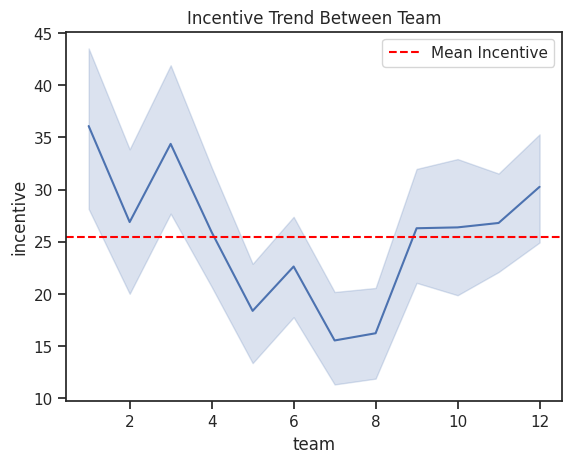

In [87]:
# Check trend on incentive by date
# Create the line plot
ax = sns.lineplot(data=data_clean, x="team", y="incentive")

# Calculate the mean value of productivity_difference
mean_value = data_clean["incentive"].mean()

# Add a horizontal line at the mean value
ax.axhline(y=mean_value, color='red', linestyle='--', label='Mean Incentive')

# Set the title
plt.title('Incentive Trend Between Team')

# Display the legend
plt.legend()

# Show the plot
plt.show()

After data cleaning, we didn't see any finishing dept received incentive. Neverthless, we can see that team 1 in sewing dept receive the highest incentive

<ipython-input-88-65cb37f06a08>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=data_clean, x="team", y="over_time", palette=custom_palette)


Text(0.5, 1.0, 'Incentive Trend Between Team')

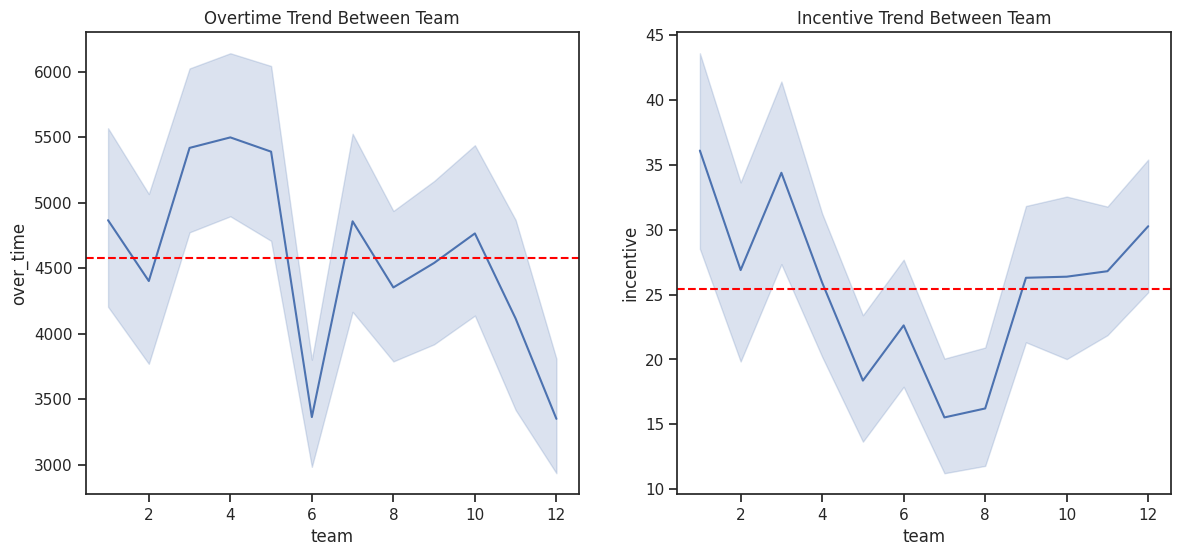

In [88]:
# Create subplot for mean no_of_workers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
# Create the line plot
ax = sns.lineplot(data=data_clean, x="team", y="over_time", palette=custom_palette)

# Calculate the mean value of productivity_difference
mean_value = data_clean["over_time"].mean()

# Add a horizontal line at the mean value
ax.axhline(y=mean_value, color='red', linestyle='--', label='Mean Overtime')

# Set the title
plt.title('Overtime Trend Between Team')

# Create subplot for mean smv
plt.subplot(1, 2, 2)

ax = sns.lineplot(data=data_clean, x="team", y="incentive")

# Calculate the mean value of productivity_difference
mean_value = data_clean["incentive"].mean()

# Add a horizontal line at the mean value
ax.axhline(y=mean_value, color='red', linestyle='--', label='Mean Incentive')

# Set the title
plt.title('Incentive Trend Between Team')

In [89]:
# Check mean value of no_of_workers for each team
mean_no_of_workers_by_team = data_clean.groupby('team')['no_of_workers'].mean()
mean_no_of_workers_by_team_sorted = mean_no_of_workers_by_team.sort_values(ascending=False)

# Check mean value of smv for each team
mean_smv_by_team = data_clean.groupby('team')['smv'].mean()
mean_smv_by_team_sorted = mean_smv_by_team.sort_values(ascending=False)


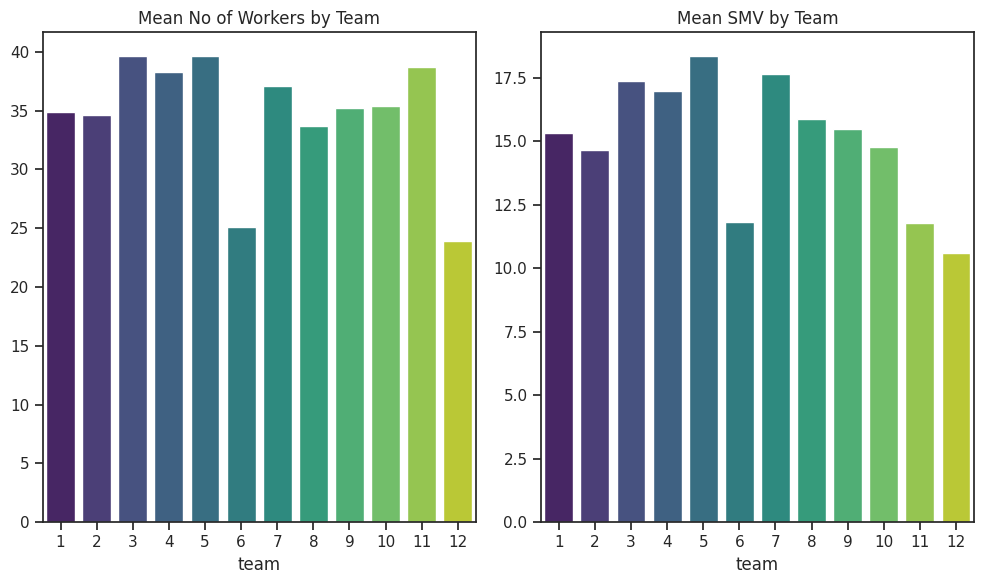

In [90]:
plt.figure(figsize=(10, 6))

# Create subplot for mean no_of_workers
plt.subplot(1, 2, 1)
sns.barplot(x=mean_no_of_workers_by_team_sorted.index, y=mean_no_of_workers_by_team_sorted.values, palette="viridis")
plt.title('Mean No of Workers by Team')

# Create subplot for mean smv
plt.subplot(1, 2, 2)
sns.barplot(x=mean_smv_by_team_sorted.index, y=mean_smv_by_team_sorted.values, palette="viridis")
plt.title('Mean SMV by Team')

plt.tight_layout()
plt.show()


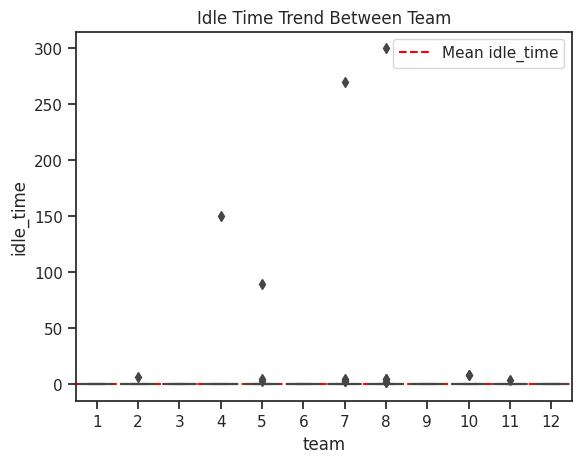

In [142]:
# Check trend on idle_time by team
# Create the line plot
ax = sns.boxplot(data=data_clean, x="team", y="idle_time")

# Calculate the mean value of idle_time
mean_value = data_clean["idle_time"].mean()

# Add a horizontal line at the mean value
ax.axhline(y=mean_value, color='red', linestyle='--', label='Mean idle_time')

# Set the title
plt.title('Idle Time Trend Between Team')

# Display the legend
plt.legend()

# Show the plot
plt.show()

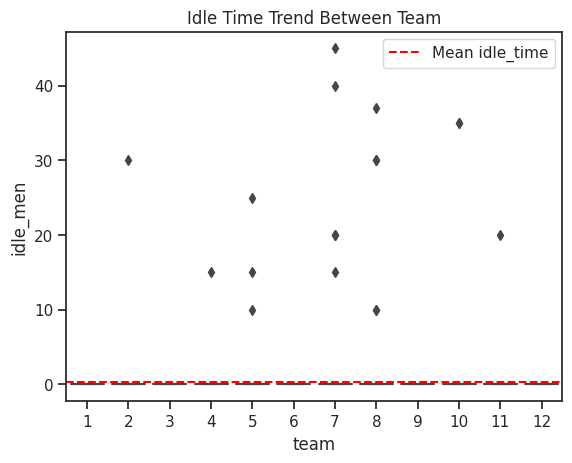

In [143]:
# Check trend on idle_men by team
# Create the line plot
ax = sns.boxplot(data=data_clean, x="team", y="idle_men")

# Calculate the mean value of idle_men
mean_value = data_clean["idle_men"].mean()

# Add a horizontal line at the mean value
ax.axhline(y=mean_value, color='red', linestyle='--', label='Mean idle_time')

# Set the title
plt.title('Idle Men Trend Between Team')

# Display the legend
plt.legend()

# Show the plot
plt.show()

## Department Performence based on Productivity

In [91]:
# Create DataFrames for the two departments
sewing_data = data_clean[data_clean['department'] == 'sewing']
finishing_data = data_clean[data_clean['department'] == 'finishing']

<ipython-input-92-6f0b2368e28f>:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.lineplot(data=data_clean, x="date", y="productivity_difference", hue="department", palette=custom_palette)


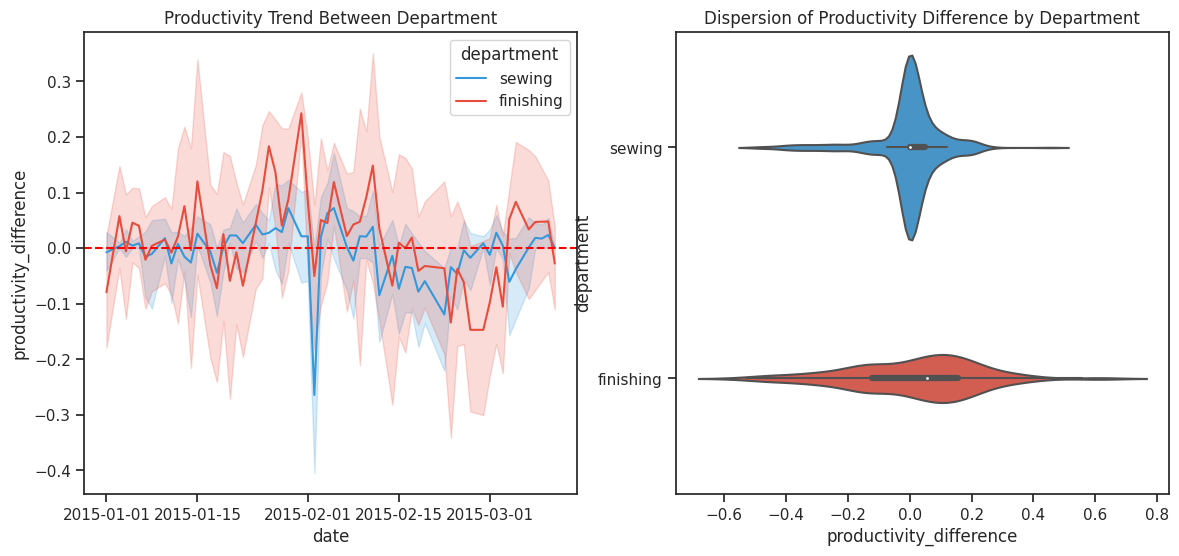

In [92]:
# Check performance of each department
# Check trend on actual_productivity by date
plt.figure(figsize=(14, 6))

# Create subplot for mean actual_productivity
plt.subplot(1, 2, 1)
# Create the line plot
ax = sns.lineplot(data=data_clean, x="date", y="productivity_difference", hue="department", palette=custom_palette)

# Calculate the median value of productivity_difference
median_value = data_clean["productivity_difference"].median()

# Add a horizontal line at the median value
ax.axhline(y=median_value, color='red', linestyle='--', label='Median Productivity Difference')

# Set the title
plt.title('Productivity Trend Between Department')

# Check on proportion of productivity_difference by department
plt.subplot(1, 2, 2)
sns.violinplot(data_clean, x="productivity_difference", y="department", palette=custom_palette)
plt.title("Dispersion of Productivity Difference by Department")
plt.show()

Generally, both sewing and finishing are struggling to achieve targeted productivity which shown by the increase of variance of productivity difference along with the increase in targeted productivity.

Finishing has inconsistent performance when it's compared to sewing

<ipython-input-93-f496b66576f9>:2: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(x='over_time', y='productivity_difference', hue='department', palette=custom_palette, data=data_clean)


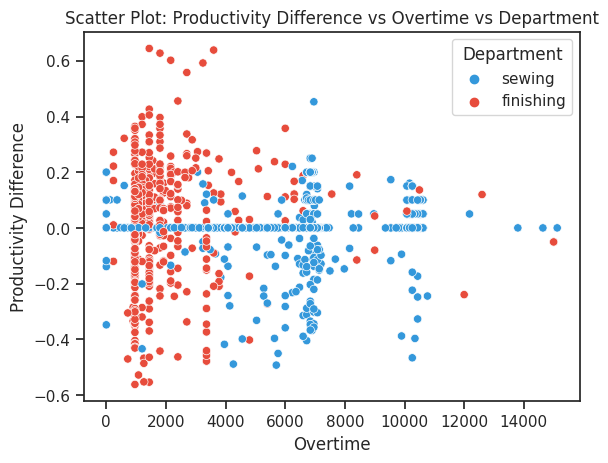

In [93]:
# Check correlation between productivity_difference and over_time
sns.scatterplot(x='over_time', y='productivity_difference', hue='department', palette=custom_palette, data=data_clean)
plt.title('Scatter Plot: Productivity Difference vs Overtime vs Department')
plt.xlabel('Overtime')
plt.ylabel('Productivity Difference')
plt.legend(title='Department')
plt.show()

Regardless its productivity consistency, finishing require less overtime than sewing

<ipython-input-94-9c1fc4ed7a50>:2: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(data=data_clean, x='incentive', y='productivity_difference', hue='department', palette=custom_palette)


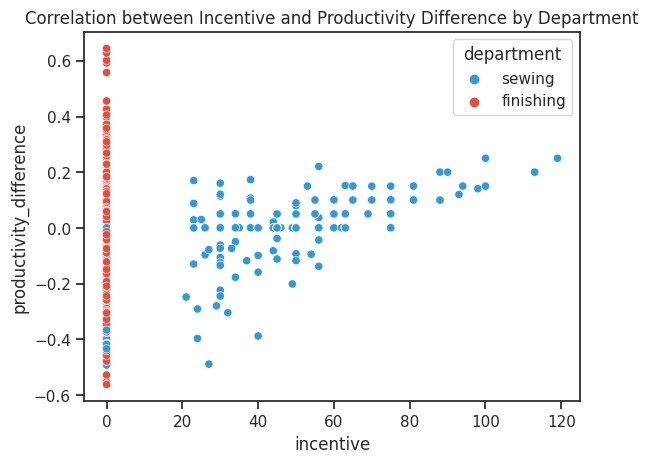

In [94]:
# Check correlation between incentive vs productivity_difference
sns.scatterplot(data=data_clean, x='incentive', y='productivity_difference', hue='department', palette=custom_palette)
plt.title("Correlation between Incentive and Productivity Difference by Department")
plt.show()

Prior to data cleaning, finishing has bigger incentive

<ipython-input-139-35512d2cb9c1>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.scatterplot(data=data_clean, x="smv", y="productivity_difference", hue="department", palette=custom_palette)


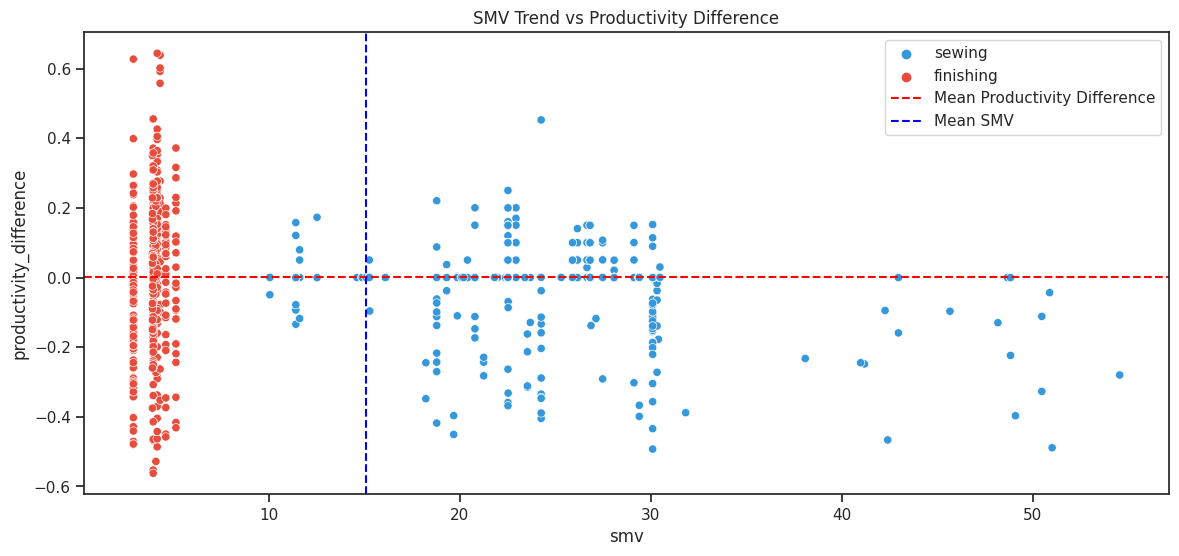

In [139]:
# Check correlation between smv vs productivity_difference
plt.figure(figsize=(14, 6))  # Adjust width and height as needed
# Create the line plot
ax = sns.scatterplot(data=data_clean, x="smv", y="productivity_difference", hue="department", palette=custom_palette)

# Calculate the mean value of productivity_difference
mean_value_productivity = data_clean["productivity_difference"].median()

# Calculate the mean value of SMV
mean_value_smv = data_clean["smv"].mean()

# Add a vertical line at the mean value of smv
ax.axhline(y=mean_value_productivity, color='red', linestyle='--', label='Mean Productivity Difference')

# Add a horizontal line at the mean value of productivity_difference
ax.axvline(x=mean_value_smv, color='blue', linestyle='--', label='Mean SMV')

# Set the title
plt.title('SMV Trend vs Productivity Difference')

# Display the legend
plt.legend()

# Show the plot
plt.show()


We can see a patern here, when SMV is above 30, they most probably has negative productivity difference. Its mean they unable to meet the targeted productivity

<ipython-input-131-912acfaaf146>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.scatterplot(data=data_clean, x="smv", y="over_time", hue="department", palette=custom_palette)


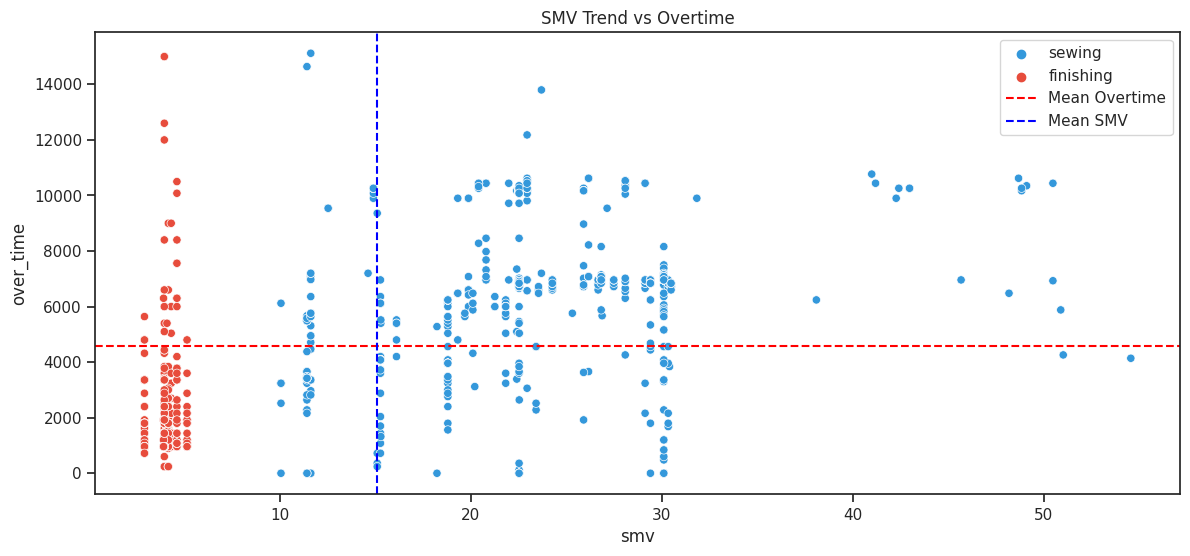

In [131]:
# Check correlation between smv vs over_time
plt.figure(figsize=(14, 6))  # Adjust width and height as needed
# Create the line plot
ax = sns.scatterplot(data=data_clean, x="smv", y="over_time", hue="department", palette=custom_palette)

# Calculate the mean value of over_time
mean_value_over_time = data_clean["over_time"].mean()

# Calculate the mean value of SMV
mean_value_smv = data_clean["smv"].mean()

# Add a horizontal line at the Mean value of smv
ax.axhline(y=mean_value_over_time, color='red', linestyle='--', label='Mean Overtime')

# Add a vertical line at the Mean value of productivity_difwipference
ax.axvline(x=mean_value_smv, color='blue', linestyle='--', label='Mean SMV')

# Set the title
plt.title('SMV Trend vs Overtime')

# Display the legend
plt.legend()

# Show the plot
plt.show()


<ipython-input-132-f12d26e3056c>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.scatterplot(data=data_clean, x="smv", y="wip", hue="department", palette=custom_palette)


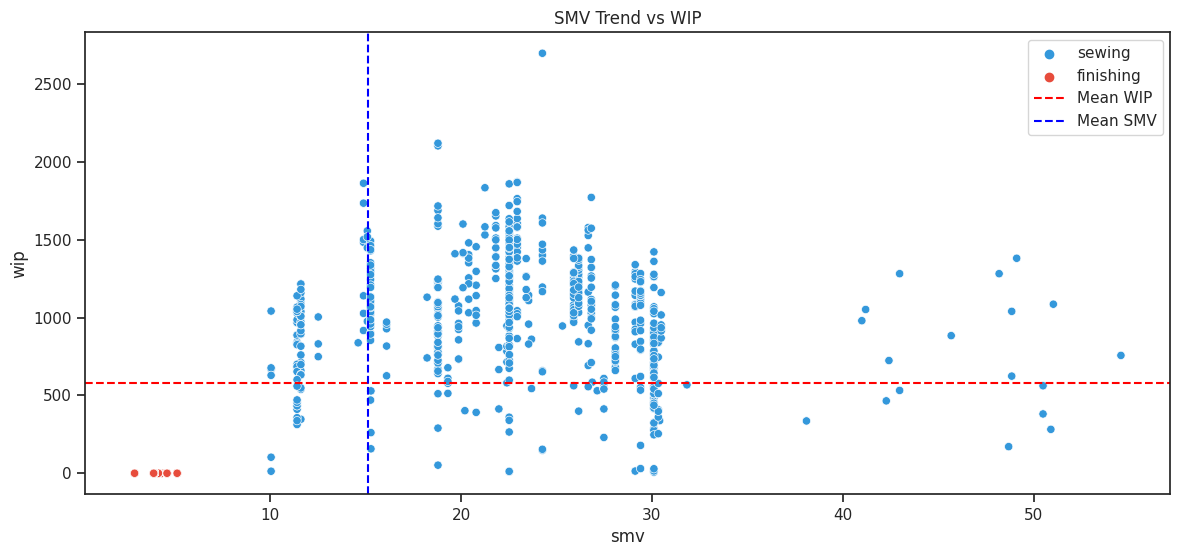

In [132]:
# Check correlation between smv vs wip
plt.figure(figsize=(14, 6))  # Adjust width and height as needed
# Create the line plot
ax = sns.scatterplot(data=data_clean, x="smv", y="wip", hue="department", palette=custom_palette)

# Calculate the mean value of wip
mean_value_wip = data_clean["wip"].mean()

# Calculate the mean value of SMV
mean_value_smv = data_clean["smv"].mean()

# Add a horizontal line at the median value of smv
ax.axhline(y=mean_value_wip, color='red', linestyle='--', label='Mean WIP')

# Add a vertical line at the median value of productivity_difwipference
ax.axvline(x=mean_value_smv, color='blue', linestyle='--', label='Mean SMV')

# Set the title
plt.title('SMV Trend vs WIP')

# Display the legend
plt.legend()

# Show the plot
plt.show()


<ipython-input-98-54ea8a6a50f5>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.scatterplot(data=data_clean, x="smv", y="incentive", hue="department", palette=custom_palette)


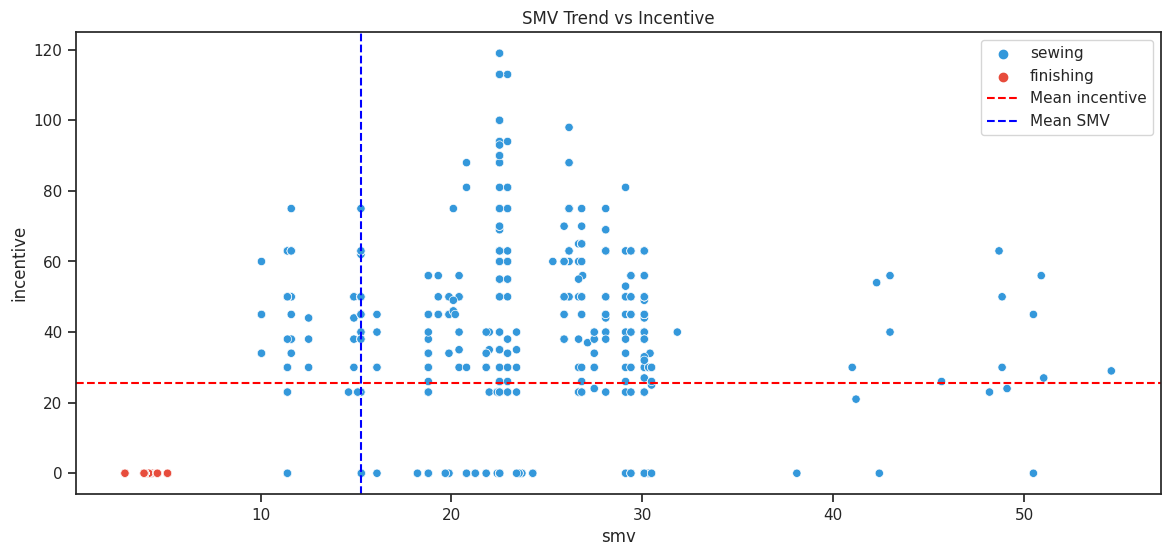

In [98]:
# Check correlation between smv vs incentive
plt.figure(figsize=(14, 6))  # Adjust width and height as needed
# Create the line plot
ax = sns.scatterplot(data=data_clean, x="smv", y="incentive", hue="department", palette=custom_palette)

# Calculate the mean value of incentive
mean_value_incentive = data_clean["incentive"].mean()

# Calculate the mean value of SMV
mean_value_smv = data_clean["smv"].mean()

# Add a horizontal line at the mean value of smv
ax.axhline(y=mean_value_incentive, color='red', linestyle='--', label='Mean incentive')

# Add a vertical line at the mean value of productivity_difwipference
ax.axvline(x=mean_value_smv, color='blue', linestyle='--', label='Mean SMV')

# Set the title
plt.title('SMV Trend vs Incentive')

# Display the legend
plt.legend()

# Show the plot
plt.show()


<ipython-input-135-9187d738c3f6>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.scatterplot(data=data_clean, x="smv", y="no_of_workers", hue="department", palette=custom_palette)


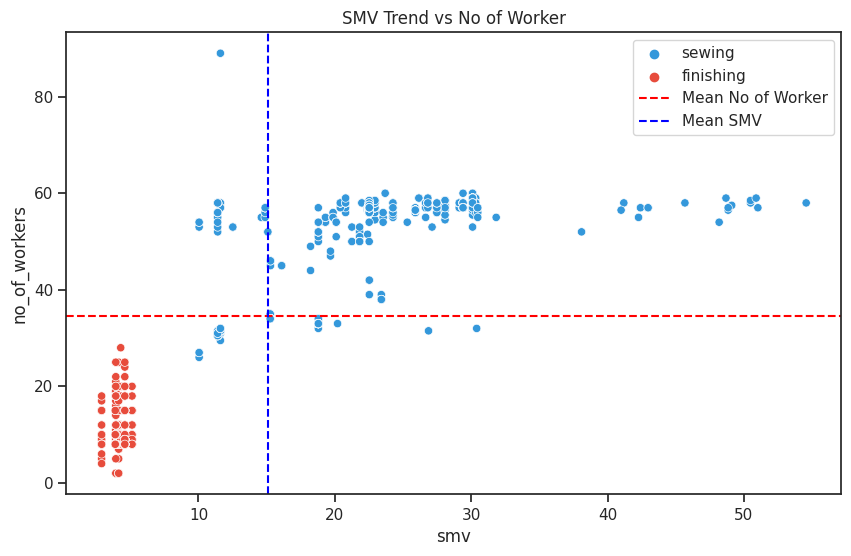

In [135]:
# Check correlation between smv vs no_of_workers
plt.figure(figsize=(10, 6))  # Adjust width and height as needed
# Create the line plot
ax = sns.scatterplot(data=data_clean, x="smv", y="no_of_workers", hue="department", palette=custom_palette)

# Calculate the mean value of no_of_workers
mean_value_worker = data_clean["no_of_workers"].mean()

# Calculate the mean value of SMV
mean_value_smv = data_clean["smv"].mean()

# Add a horizontal line at the mean value of smv
ax.axhline(y=mean_value_worker, color='red', linestyle='--', label='Mean No of Worker')

# Add a vertical line at the mean value of productivity_difwipference
ax.axvline(x=mean_value_smv, color='blue', linestyle='--', label='Mean SMV')

# Set the title
plt.title('SMV Trend vs No of Worker')

# Display the legend
plt.legend()

# Show the plot
plt.show()


No adjustment on number of worker for smv > 30

<ipython-input-140-4150ee497dfb>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.scatterplot(data=data_clean, x="over_time", y="no_of_workers", hue="department", palette=custom_palette)


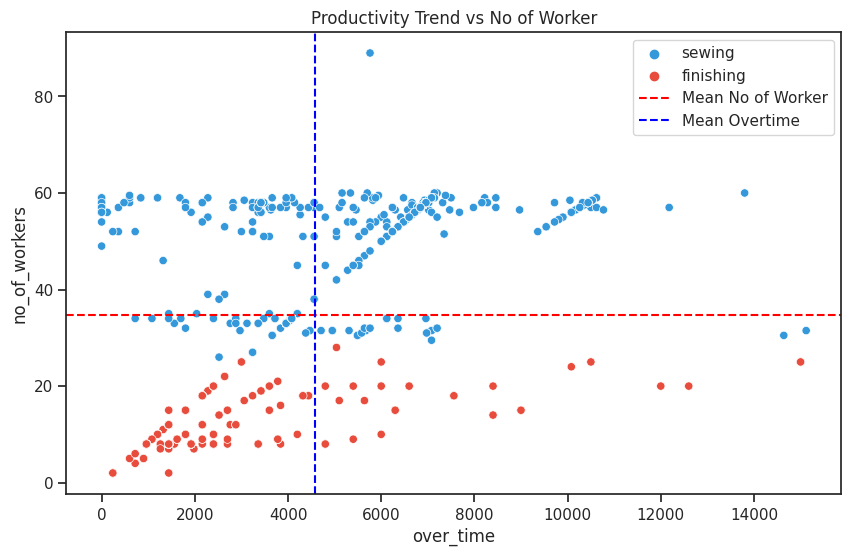

In [140]:
# Check correlation between smv vs no_of_workers
plt.figure(figsize=(10, 6))  # Adjust width and height as needed
# Create the line plot
ax = sns.scatterplot(data=data_clean, x="over_time", y="no_of_workers", hue="department", palette=custom_palette)

# Calculate the mean value of incentive
mean_value_worker = data_clean["no_of_workers"].mean()

# Calculate the mean value of SMV
mean_value_over_time = data_clean["over_time"].mean()

# Add a horizontal line at the median value of smv
ax.axhline(y=mean_value_worker, color='red', linestyle='--', label='Mean No of Worker')

# Add a vertical line at the median value of productivity_difwipference
ax.axvline(x=mean_value_over_time, color='blue', linestyle='--', label='Mean Overtime')

# Set the title
plt.title('Productivity Trend vs No of Worker')

# Display the legend
plt.legend()

# Show the plot
plt.show()


<ipython-input-141-ca071c658777>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.scatterplot(data=data_clean, x="incentive", y="wip", hue="department", palette=custom_palette)


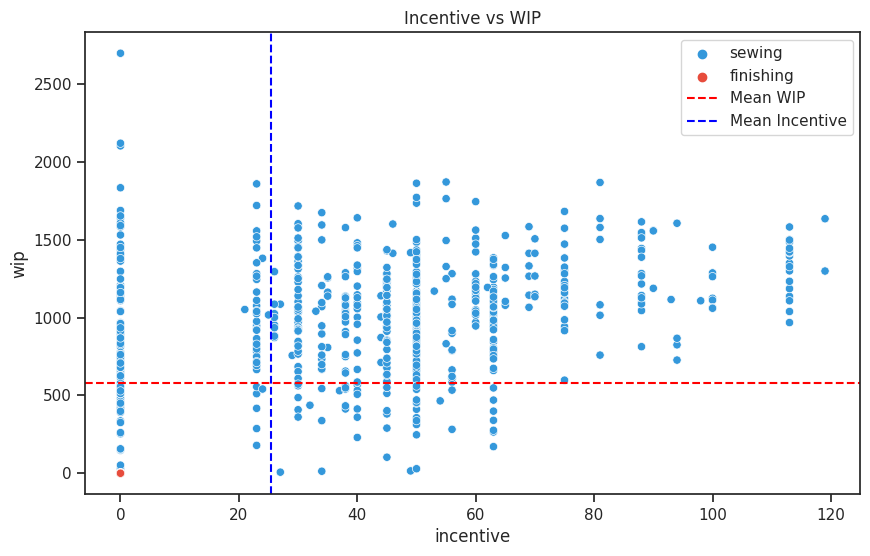

In [141]:
# Check correlation between incentive vs wip
plt.figure(figsize=(10, 6))  # Adjust width and height as needed
# Create the line plot
ax = sns.scatterplot(data=data_clean, x="incentive", y="wip", hue="department", palette=custom_palette)

# Calculate the mean value of incentive
mean_value_wip = data_clean["wip"].mean()

# Calculate the mean value of SMV
mean_value_incentive = data_clean["incentive"].mean()

# Add a horizontal line at the median value of smv
ax.axhline(y=mean_value_wip, color='red', linestyle='--', label='Mean WIP')

# Add a vertical line at the median value of productivity_difwipference
ax.axvline(x=mean_value_incentive, color='blue', linestyle='--', label='Mean Incentive')

# Set the title
plt.title('Incentive vs WIP')

# Display the legend
plt.legend()

# Show the plot
plt.show()


<ipython-input-146-1e7869173d78>:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.scatterplot(data=data_clean, x="idle_men", y="idle_time", hue="department", palette=custom_palette)


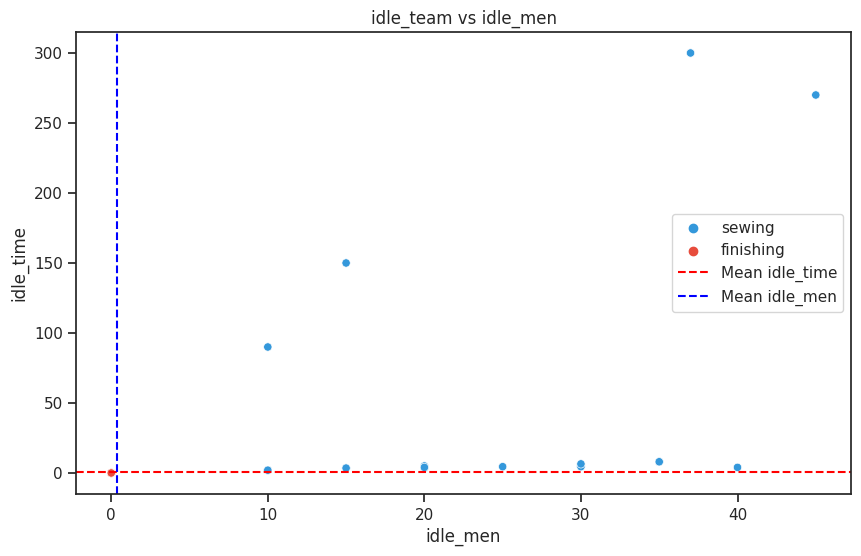

In [146]:
# Check correlation between idle_men vs idle_time
plt.figure(figsize=(10, 6))  # Adjust width and height as needed
# Create the line plot
ax = sns.scatterplot(data=data_clean, x="idle_men", y="idle_time", hue="department", palette=custom_palette)

# Calculate the mean value of incentive
mean_value_idle_time = data_clean["idle_time"].mean()

# Calculate the mean value of idle_men
mean_value_idle_men = data_clean["idle_men"].mean()

# Add a horizontal line at the median value of idle_time
ax.axhline(y=mean_value_idle_time, color='red', linestyle='--', label='Mean idle_time')

# Add a vertical line at the median value of productivity_difwipference
ax.axvline(x=mean_value_idle_men, color='blue', linestyle='--', label='Mean idle_men')

# Set the title
plt.title('idle_team vs idle_men')

# Display the legend
plt.legend()

# Show the plot
plt.show()


<ipython-input-147-22af8a3e4628>:6: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=data_clean, x="date", y="idle_time", hue="department", palette=custom_palette)
<ipython-input-147-22af8a3e4628>:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=data_clean, x="date", y="idle_men", hue="department", palette=custom_palette)


Text(0.5, 1.0, 'idle men Between Department')

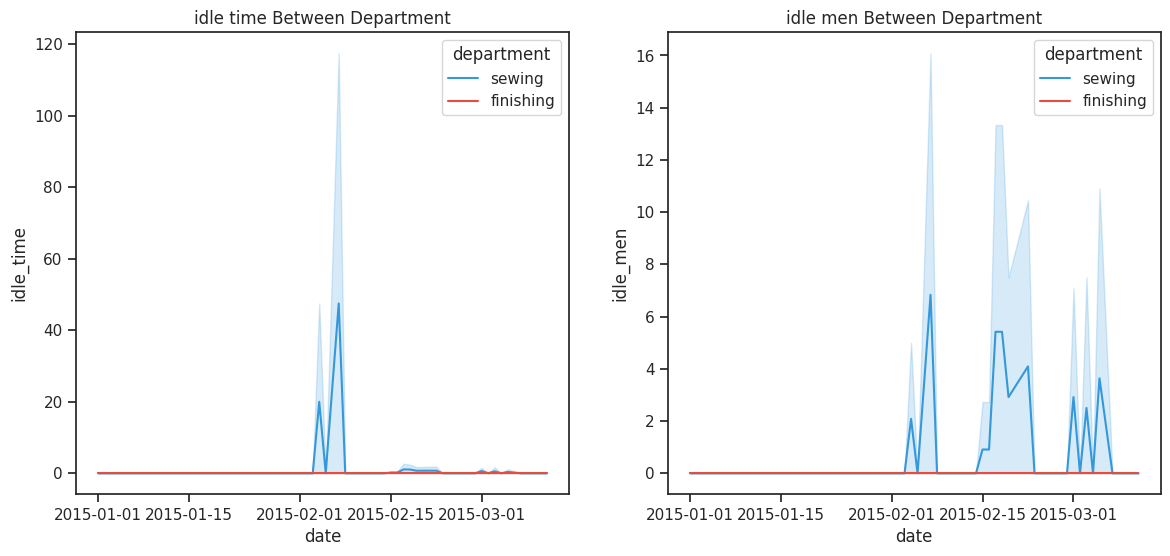

In [147]:
# Check idle time and idle men
plt.figure(figsize=(14, 6))

# Create subplot
plt.subplot(1, 2, 1)
sns.lineplot(data=data_clean, x="date", y="idle_time", hue="department", palette=custom_palette)
plt.title('idle time Between Department')

# Create subplot
plt.subplot(1, 2, 2)
sns.lineplot(data=data_clean, x="date", y="idle_men", hue="department", palette=custom_palette)
plt.title('idle men Between Department')


More idle time and idle men occured after february

<ipython-input-148-6037ce062161>:6: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(data=data_clean, x="idle_time", y="productivity_difference", hue="department", palette=custom_palette)
<ipython-input-148-6037ce062161>:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(data=data_clean, x="idle_men", y="productivity_difference", hue="department", palette=custom_palette)


Text(0.5, 1.0, 'idle men vs productivity Between Department')

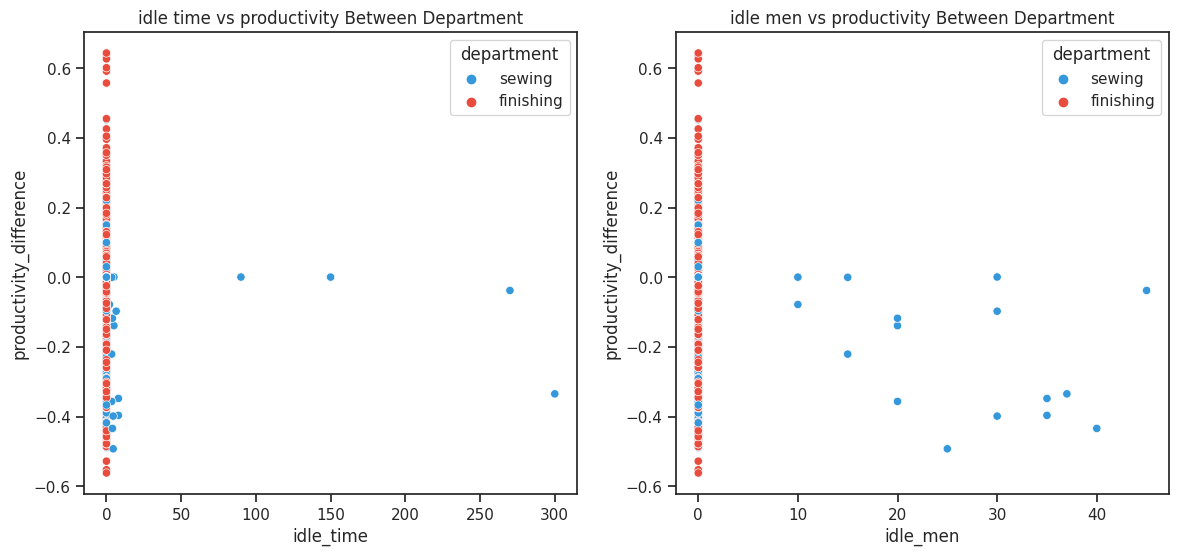

In [148]:
# Check idle time and idle men
plt.figure(figsize=(14, 6))

# Create subplot
plt.subplot(1, 2, 1)
sns.scatterplot(data=data_clean, x="idle_time", y="productivity_difference", hue="department", palette=custom_palette)
plt.title('idle time vs productivity Between Department')

# Create subplot
plt.subplot(1, 2, 2)
sns.scatterplot(data=data_clean, x="idle_men", y="productivity_difference", hue="department", palette=custom_palette)
plt.title('idle men vs productivity Between Department')

Everytime idle men or idle time occur, the productivity drop

# Statistical Inference

In [101]:
# statistics
import scipy.stats as stats

# Import library for statistical inference
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import anderson

# modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm



## Effect of Days against productivity

Let see on whether there are a sign of effect days towards actual productivity

In [150]:
# Perform ANOVA
anova_result = f_oneway(*[group['productivity_difference'] for name, group in data_clean.groupby('day')])

# Display the result
print("ANOVA Result:")
print(anova_result)

# Extract p-value from the result
p_value = anova_result.pvalue
print("\nP-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis. There are significant differences between the groups.")
else:
    print("\nFail to reject the null hypothesis. No significant differences between the groups.")

ANOVA Result:
F_onewayResult(statistic=0.590796321520924, pvalue=0.7070717738768765)

P-value: 0.7070717738768765

Fail to reject the null hypothesis. No significant differences between the groups.


## Check on difference of productivity between team

In [151]:
# Perform ANOVA
anova_result = f_oneway(*[group['productivity_difference'] for name, group in data_clean.groupby('team')])

# Display the result
print("ANOVA Result:")
print(anova_result)

# Extract p-value from the result
p_value = anova_result.pvalue
print("\nP-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis. There are significant differences between the groups.")
else:
    print("\nFail to reject the null hypothesis. No significant differences between the groups.")

ANOVA Result:
F_onewayResult(statistic=7.283656145003633, pvalue=3.9574037814200765e-12)

P-value: 3.9574037814200765e-12

Reject the null hypothesis. There are significant differences between the groups.


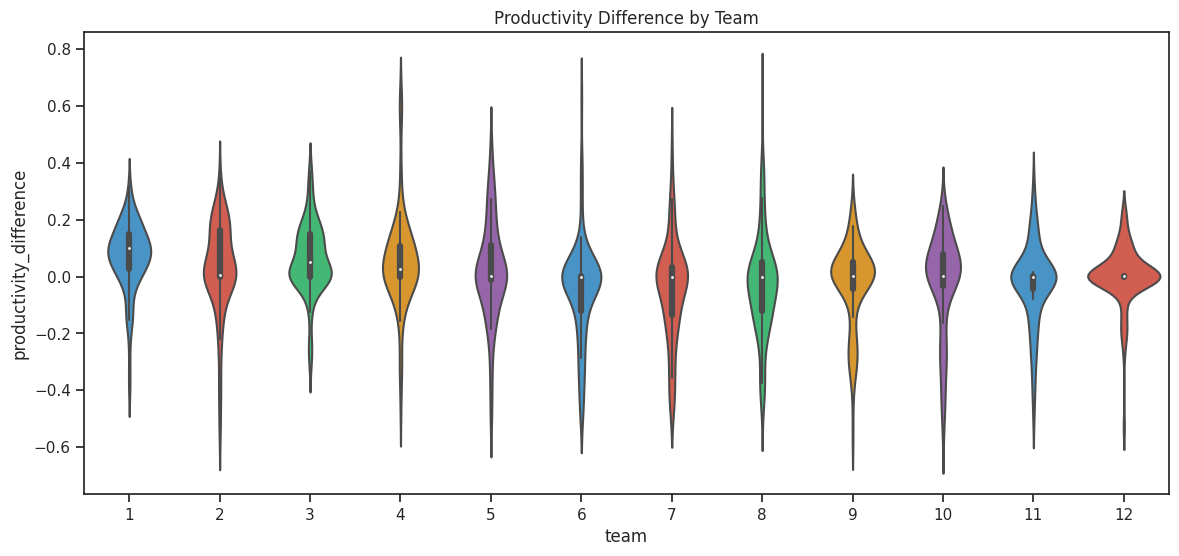

In [104]:
# Check on proportion of productivity_difference by team
plt.figure(figsize=(14, 6))  # Adjust width and height as needed
sns.violinplot(data_clean, x="team", y="productivity_difference", palette=custom_palette)
plt.title("Productivity Difference by Team")
plt.show()

Visually all teams have different median value for productivity difference.

## Check on difference of productivity between department

In this case, we would like to know whether Sewing Dept and Finishing Dept has different targeted value

In [105]:
data_clean['department'].value_counts()

sewing       680
finishing    496
Name: department, dtype: int64

In [106]:
# Extract the 'actual_productivity' columns for the two departments
sewing_productivity = sewing_data['productivity_difference'].dropna()
finishing_productivity = finishing_data['productivity_difference'].dropna()

In [107]:
# Perform Levene's test for equality of variances
statistic, p_value = stats.levene(sewing_productivity, finishing_productivity)

# Print the results
print(f'Levene\'s Test Statistic: {statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('The variances are significantly different.')
else:
    print('The variances are not significantly different.')

Levene's Test Statistic: 252.9598895533918
P-value: 9.918879940534791e-52
The variances are significantly different.


In [108]:
# Perform a two-sample t-test equal variance
t_statistic, p_value = ttest_ind(sewing_productivity, finishing_productivity, equal_var=False)

# Display the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is below a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The difference in targeted productivity between 'sewing' and 'finishing' is statistically significant.")
else:
    print("There is no significant difference in productivity between 'sewing' and 'finishing'.")

T-statistic: -1.8411402395032148
P-value: 0.06602622709218095
There is no significant difference in productivity between 'sewing' and 'finishing'.


# Building Regression Model

## Effect of Incentive to Productivity

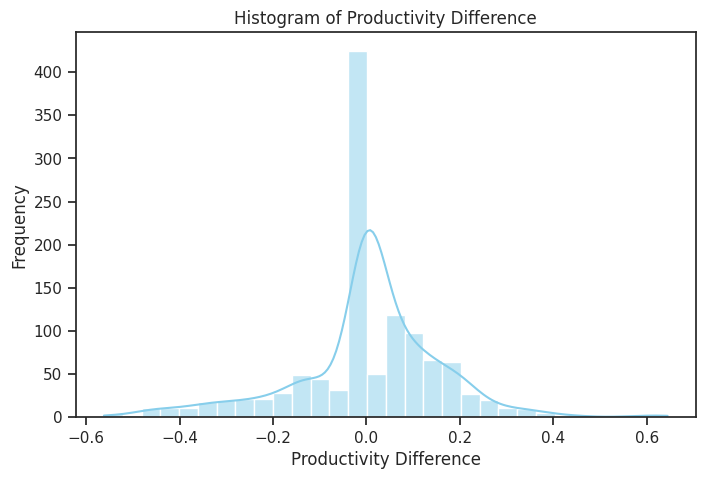

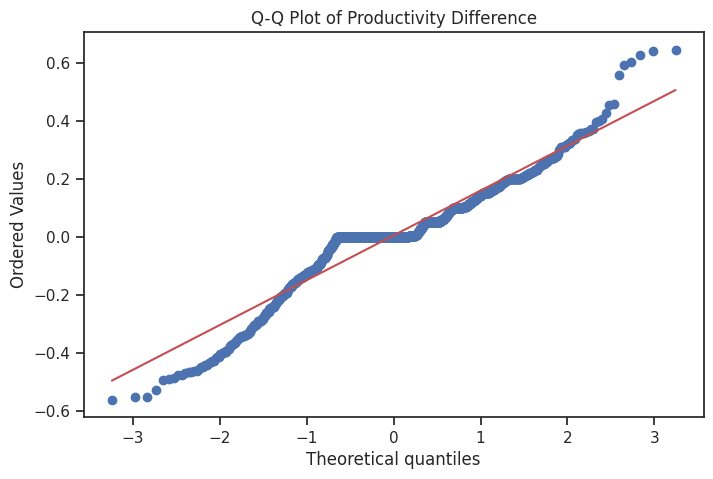

In [109]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_clean['productivity_difference'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Productivity Difference')
plt.xlabel('Productivity Difference')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 5))
stats.probplot(data_clean['productivity_difference'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Productivity Difference')
plt.show()

In [110]:
# Check normality of productivity_difference using Anderson-Darling test
result = anderson(data_clean['productivity_difference'], dist='norm')
print(f'Anderson-Darling Test - Statistic: {result.statistic}, Critical Values: {result.critical_values}, P-value: {result.significance_level}')

# Interpret the result
if result.statistic > result.critical_values[2]:
    print("The data does not follow a normal distribution (reject H0)")
else:
    print("The data appears to follow a normal distribution (fail to reject H0)")


Anderson-Darling Test - Statistic: 39.21767985950578, Critical Values: [0.574 0.654 0.784 0.915 1.088], P-value: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject H0)


<ipython-input-111-9c1fc4ed7a50>:2: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(data=data_clean, x='incentive', y='productivity_difference', hue='department', palette=custom_palette)


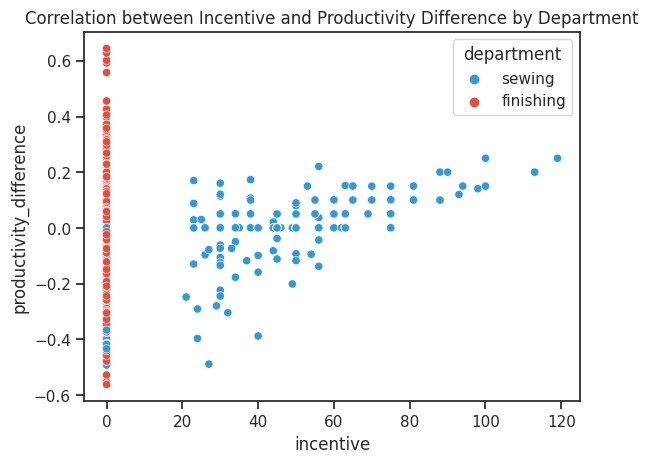

In [111]:
# Check correlation between incentive vs productivity_difference
sns.scatterplot(data=data_clean, x='incentive', y='productivity_difference', hue='department', palette=custom_palette)
plt.title("Correlation between Incentive and Productivity Difference by Department")
plt.show()

<ipython-input-112-234b766bff2e>:2: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.scatterplot(data=sewing_data, x='incentive', y='productivity_difference', hue='department', palette=custom_palette)


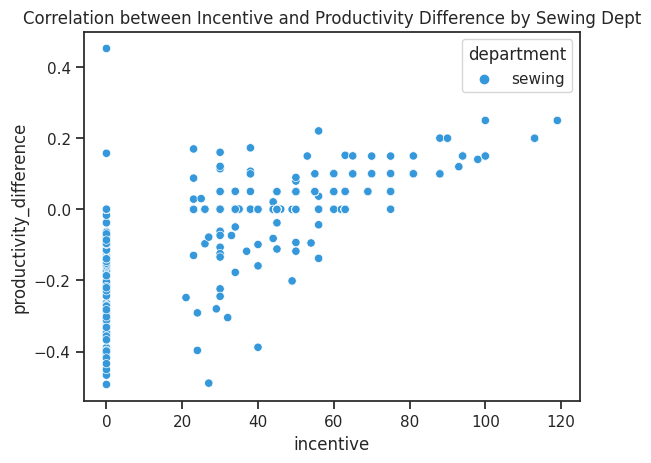

In [112]:
# Check correlation between incentive vs productivity_difference
sns.scatterplot(data=sewing_data, x='incentive', y='productivity_difference', hue='department', palette=custom_palette)
plt.title("Correlation between Incentive and Productivity Difference by Sewing Dept")
plt.show()

In [113]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

In [114]:
x = sewing_data["incentive"]
y = sewing_data["productivity_difference"]

# Create OLS model object
regression_incentive = smf.ols("productivity_difference ~ incentive", sewing_data)

# Fit the model
results = regression_incentive.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
effect_incentive_productivity = print_coef_std_err(results)


In [115]:
effect_incentive_productivity

coef   std err
Intercept -0.122428  0.006013
incentive  0.002706  0.000116

In [116]:
results.rsquared

0.44503610971985164

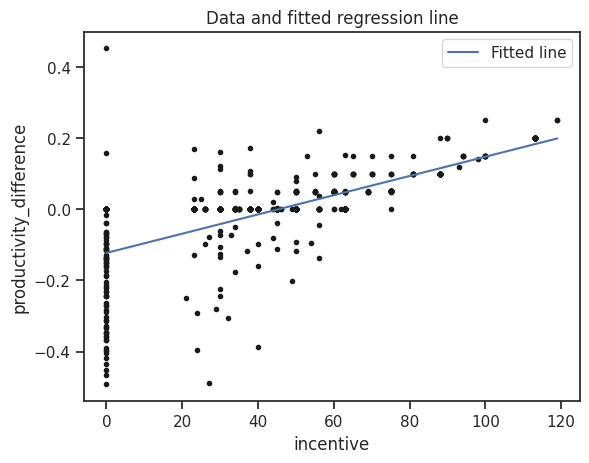

In [117]:
predictor = "incentive"
outcome = "productivity_difference"
data = sewing_data.copy()
results_ = effect_incentive_productivity.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("productivity_difference")
plt.xlabel("incentive")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

**productivity_difference = -0.122 + 0.002incentive**

*  In specific case for Sewing Dept, the average of productivity difference without incentive is -0.122. Meaning without incentive, the actual productivity is lower than the targeted productivity.
*  Based on regression model, we can understand that every incentive given will help to increase productivity 0.002%


## Effect of SMV to Number of Worker in Sewing Dept

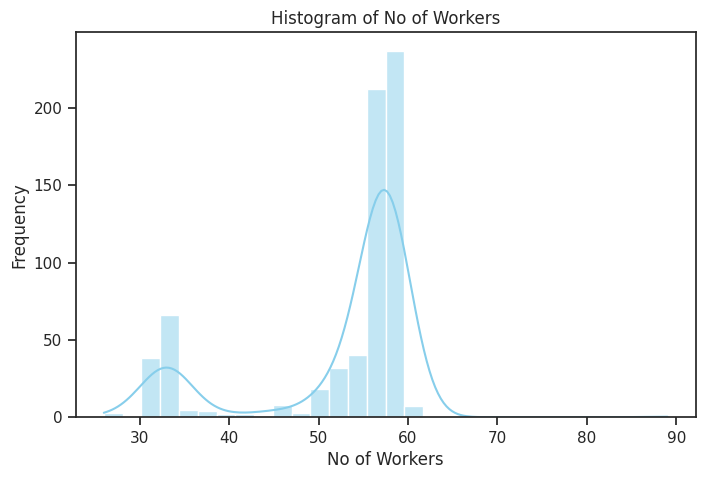

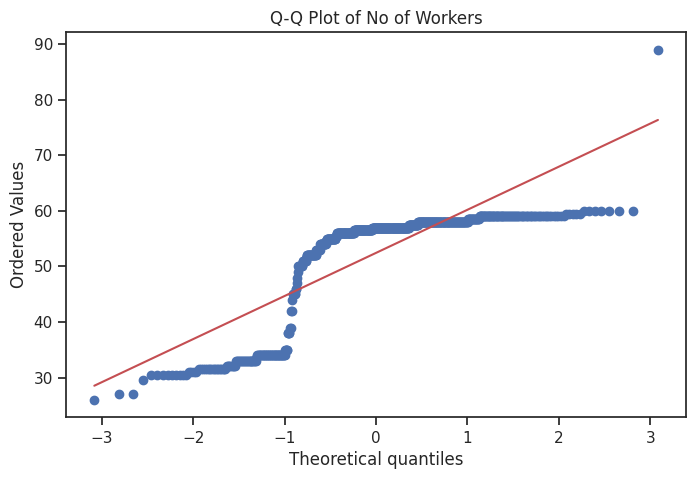

In [118]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(sewing_data['no_of_workers'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of No of Workers')
plt.xlabel('No of Workers')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 5))
stats.probplot(sewing_data['no_of_workers'], dist="norm", plot=plt)
plt.title('Q-Q Plot of No of Workers')
plt.show()

In [119]:
# Check normality of no_of_workers using Anderson-Darling test
result = anderson(sewing_data['no_of_workers'], dist='norm')
print(f'Anderson-Darling Test - Statistic: {result.statistic}, Critical Values: {result.critical_values}, P-value: {result.significance_level}')

# Interpret the result
if result.statistic > result.critical_values[2]:
    print("The data does not follow a normal distribution (reject H0)")
else:
    print("The data appears to follow a normal distribution (fail to reject H0)")


Anderson-Darling Test - Statistic: 102.27350705952949, Critical Values: [0.573 0.652 0.782 0.913 1.086], P-value: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject H0)


In [120]:
x = sewing_data["smv"]
y = sewing_data["no_of_workers"]

# Create OLS model object
regression_smv = smf.ols("no_of_workers ~ smv", sewing_data)

# Fit the model
results = regression_smv.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
effect_smv_no_workers = print_coef_std_err(results)
effect_smv_no_workers

coef   std err
Intercept  34.316709  1.024159
smv         0.778681  0.042128

In [121]:
results.rsquared

0.3350660796545035

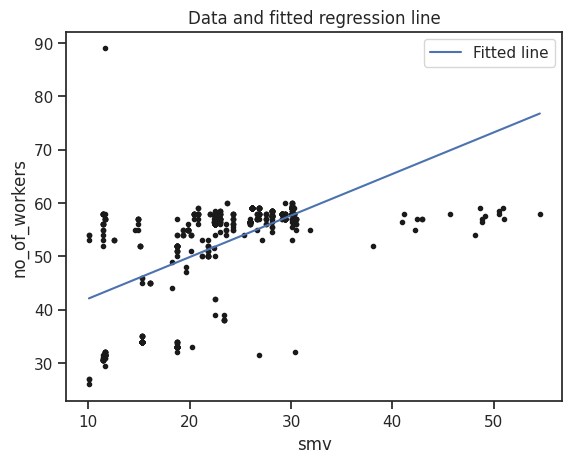

In [122]:
predictor = "smv"
outcome = "no_of_workers"
data = sewing_data.copy()
results_ = effect_smv_no_workers.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("no_of_workers")
plt.xlabel("smv")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [123]:
smv_1 = 40
smv_2 = 50

# Linear regression equation
no_of_workers_1 = 34.31 + 0.77 * smv_1
no_of_workers_2 = 34.31 + 0.77 * smv_2

# Print the results
print('Recommended number of workers for SMV 40:', no_of_workers_1)
print('Recommended number of workers for SMV 50:', no_of_workers_2)


Recommended number of workers for SMV 40: 65.11
Recommended number of workers for SMV 50: 72.81


**no_of_workers = 34.31 + 0.77smv**

*  The average of number of workers needed is 34
*  Every minute increase in SMV, it requires at least additional 0.77~1 workers

*  Based on regression model, ideally, we need to increase worker up to 60-70 for smv 40-50



## Building Producitivity Improvement Model

In [124]:
# cross validation using statsmodel prepartion
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold

In [125]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :return df: <pandas DataFrame>  combined estimated coefficient and standard error of model estimate
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

class StatsmodelsRegressor(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """

    def __init__(self, sm_class, sm_formula):
        self.sm_class = sm_class
        self.sm_formula = sm_formula
        self.model = None
        self.result = None

    def fit(self, data, dummy):
        self.model = self.sm_class(self.sm_formula, data)
        self.result = self.model.fit()

    def predict(self,X):
        return self.result.predict(X)

def kfold_split(data, n_fold):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :param n_fold: <int> Number of fold in k-fold CV
    :return df: <pandas DataFrame>  combined estimated coefficient and standard error of model estimate
    """
    kfold = KFold(n_splits = n_fold,
                  shuffle = True,
                  random_state=123)
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(kfold.split(data)):
        print(f"fold {i+1}, train data rows: {len(train)}, test data rows: {len(test)}")
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()

    return (fold_train, fold_test)

In [153]:
# Create a class model

ols_productivity = StatsmodelsRegressor(smf.ols, "productivity_difference ~ smv + incentive + idle_men")

In [154]:
# Create k-fold splitter object

kfold = KFold(n_splits=5, shuffle = True, random_state=123)

In [155]:
scores_ols_productivity = cross_val_score(estimator = ols_productivity,
                                       X = data_clean,
                                       y = data_clean["productivity_difference"],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_productivity= pd.DataFrame(data = scores_ols_productivity,
                                    columns=["test_rsquared"])
scores_ols_productivity["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_productivity

test_rsquared    folds
0       0.150143  Folds 1
1       0.160815  Folds 2
2       0.107052  Folds 3
3       0.079939  Folds 4
4       0.109156  Folds 5

In [156]:
scores_ols_productivity['test_rsquared'].mean()

0.12142093105335769

In [161]:
# Create OLS model object
model = smf.ols("productivity_difference ~ smv + incentive + idle_men", data_clean)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_garment = print_coef_std_err(results)
results_garment

coef   std err
Intercept  0.023978  0.007459
smv       -0.004556  0.000509
incentive  0.002025  0.000185
idle_men  -0.005252  0.001355

productivity_difference = 0.024 - 0.0046smv + 0.002incentive - 0.0053idle_men



*   The productivity_difference when all independent variables (smv, incentive, and idle_men) are zero is 0.024. In this context, it represents the baseline level of productivity_difference when all predictors are zero.
*   For each one-unit increase in smv, the model predicts a decrease in productivity_difference by 0.0046 units, holding other variables constant.
*   For each one-unit increase in incentive, the model predicts an increase in productivity_difference by 0.002 units, holding other variables constant.
*   For each one-unit increase in idle_men, the model predicts a decrease in productivity_difference by 0.0053 units, holding other variables constant



In [163]:
# Centering
data_clean["c_smv"] = data_clean["smv"] - np.mean(data_clean["smv"])
data_clean["c_incentive"] = data_clean["incentive"] - np.mean(data_clean["incentive"])
data_clean["c_idle_men"] = data_clean["idle_men"] - np.mean(data_clean["idle_men"])

In [164]:
# Create OLS model object
model = smf.ols("productivity_difference ~ c_smv + c_incentive + c_idle_men", data_clean)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_garment = print_coef_std_err(results)
results_garment

coef   std err
Intercept    0.004764  0.004381
c_smv       -0.004556  0.000509
c_incentive  0.002025  0.000185
c_idle_men  -0.005252  0.001355

*   the average productivity difference when smv is average, incentive is average, and idle men is average, is 0.004
*   the average productivity difference between two teams whose have one point different in smv is -0.004, where team with the highest smv have lower productivity
*   the average productivity difference between two teams whose have one point different in incentive is 0.002, where team with the highest incentive have higher productivity
*   the average productivity difference between two teams whose have one point different in idle men is -0.005, where team with the highest idle men have lower productivity

In [158]:
# Define the independent variables
X = data_clean[['smv', 'incentive', 'idle_men']]
# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Define the dependent variable
y = data_clean['productivity_difference']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     productivity_difference   R-squared:                       0.123
Model:                                 OLS   Adj. R-squared:                  0.121
Method:                      Least Squares   F-statistic:                     54.99
Date:                     Sun, 07 Jan 2024   Prob (F-statistic):           2.94e-33
Time:                             11:39:10   Log-Likelihood:                 562.48
No. Observations:                     1176   AIC:                            -1117.
Df Residuals:                         1172   BIC:                            -1097.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

Despite low r-square, the model passed goodness of fit.

# References


*   https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees
*   https://www.kaggle.com/code/parvathicg/garments-actual-productivity
*   https://www.kaggle.com/code/ishadss/regression-to-calculate-productivity
*   https://www.kaggle.com/code/ishadss/plotly-eda-on-garment-workers-productivity-data




